## Customer Churn Analysis

#### Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.


Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 


You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
url= 'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'
df= pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Churn is our target variable.

In [5]:
df.duplicated().sum()

0

No duplicate rows present

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Null values present.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges is object datatype though it have float values.

In [8]:
# number of unique values in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

'customerID' holds 7043 unique value which means these values are different for every row. Also, this column is used for identification of each customers. we can delete this.

SeniorCitizen has only 2 values and is of integer datatype.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observing mean, std, min, max and percentiles we can say that the data is skewed and outliers are present.

In [10]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [11]:
df=df.drop(['customerID' ], axis=1)
df.shape

(7043, 20)

In [12]:
#target variable
target= 'Churn'

### More on Understanding columns

In [13]:
pd.DataFrame({'Unique_values': df.nunique(), 'DataType': df.dtypes})

,Unique_values,DataType
gender,2,object
SeniorCitizen,2,int64
Partner,2,object
Dependents,2,object
tenure,73,int64
PhoneService,2,object
MultipleLines,3,object
InternetService,3,object
OnlineSecurity,3,object
OnlineBackup,3,object


As we already analysed, SeniorCitizen having only 2 unique values and is of object datatype.

TotalCharges have floatvalues with 6531 unique values and is of object datatype. It means there is possibility that empty spaces are present in this column.

In [14]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print()

gender
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

DeviceP

Target variable is imbalanced with 'No' as majority class.

There are columns whose values depends on values of either 'PhoneService' or 'InternetService'.

We need to change datatype of SeniorCitizen to object and TotalCharges to float.

#### TotalCharges

In [15]:
#check if any spaces present in the dataset
' ' in df['TotalCharges'].values

True

Empty spaces are present.

In [16]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

There are 11 rows with blank values. Lets fill them with null.

In [17]:
df['TotalCharges']= df['TotalCharges'].replace(" ", np.nan)

In [18]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we have 11 null values in column 'TotalCharges'. Let's change the datatype to float.

In [19]:
df['TotalCharges']=df['TotalCharges'].astype('float') 

In [20]:
# Changing datatype of SeniorCitizen 
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [21]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
df[target].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable is imbalanced.

### Sort continuous and categorical column names

In [23]:
con=df.select_dtypes(include= 'number').columns    #continous columns
con

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [24]:
cat=df.select_dtypes(exclude= 'number').columns    #categorical columns
cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

### Filling Null values

In [25]:
# null values in terms of percentage
perc= round(df.isnull().sum()/len(df)*100,2)

In [26]:
pd.DataFrame({'Columns': df.isnull().sum().index, 'Number_of_null_values':df.isnull().sum().values,
             'Perectage_null_values': perc.values})

,Columns,Number_of_null_values,Perectage_null_values
0,gender,0,0.00
1,SeniorCitizen,0,0.00
2,Partner,0,0.00
3,Dependents,0,0.00
4,tenure,0,0.00
5,PhoneService,0,0.00
6,MultipleLines,0,0.00
7,InternetService,0,0.00
8,OnlineSecurity,0,0.00
9,OnlineBackup,0,0.00


Only 0.16% of the data is null. We can either delete it or can use any method to fill the value. It will hardly make any difference considering the shape of dataset.

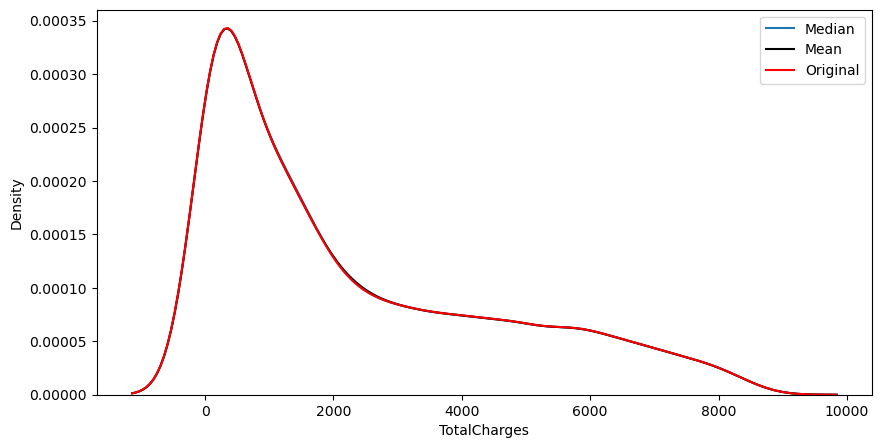

In [27]:
i='TotalCharges'
med= df[i].fillna(df[i].median())
avg= df[i].fillna(df[i].mean())

    
plt.figure(figsize=(10,5))
sns.distplot(med, hist=False )
sns.distplot(avg, hist=False, color='Black' )
sns.distplot(df[i], hist=False, color='red')
plt.legend(['Median', 'Mean', 'Original'])

As we can see any of the method can be used to fill the null values. We will use mean.

In [28]:
df['TotalCharges']=avg

In [29]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Null values are filled.

#### Distribution plot and skewness of continous columns

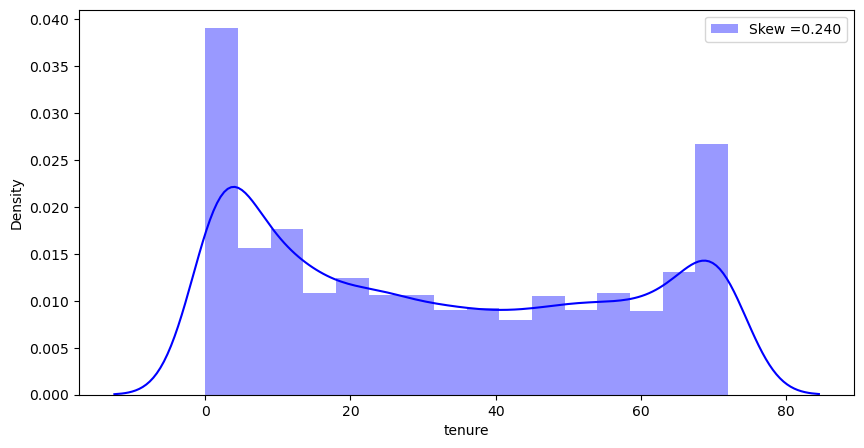

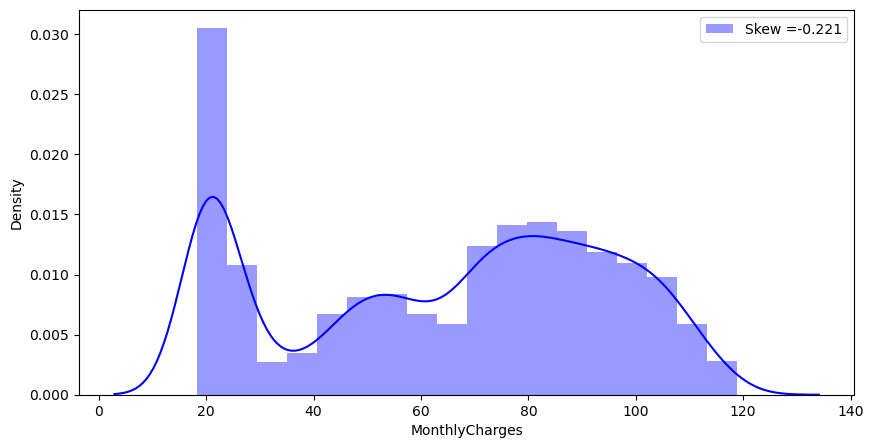

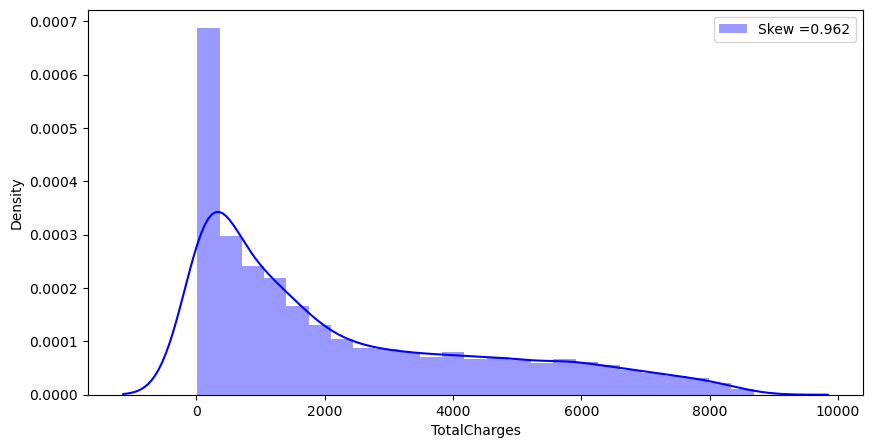

In [30]:
# Distribution plot and skewness

for i in con:
    plt.figure(figsize=(10,5))
    skew= df[i].skew()
    sns.distplot(df[i], color='blue', label= 'Skew =%.3f' %skew)
    plt.legend(loc='upper right')
    
#plt.tight_layout()

Data is skewed.

### Visualisation

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

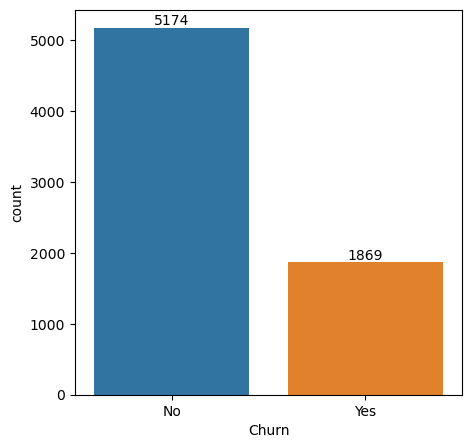

In [32]:
# target variable
plt.figure(figsize=(5,5))
ax= sns.countplot(x=df[target], data=df)
plt.bar_label(ax.containers[0])
plt.show()

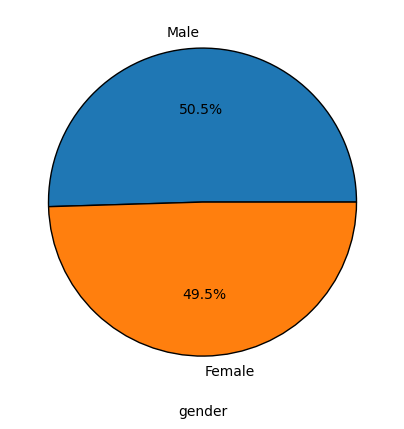

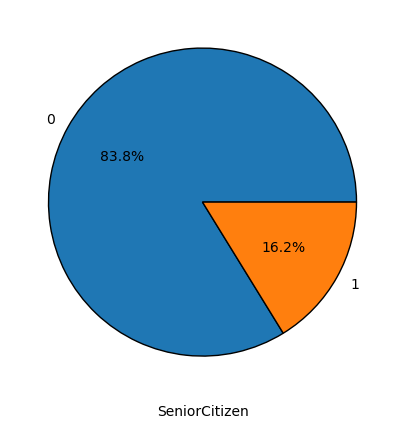

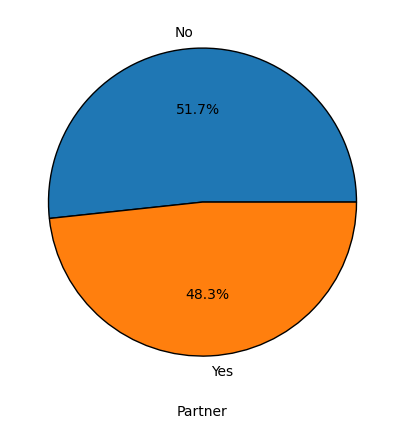

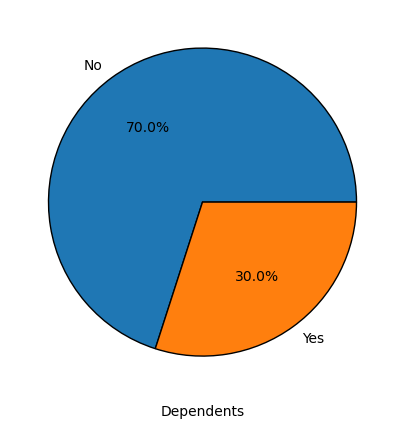

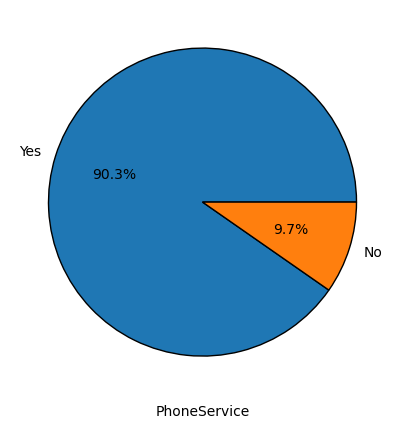

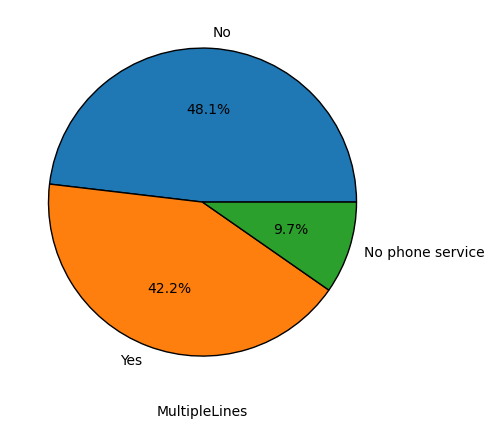

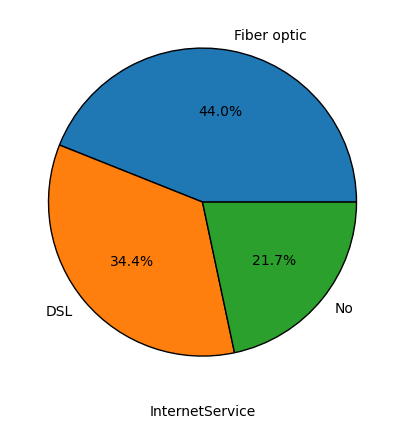

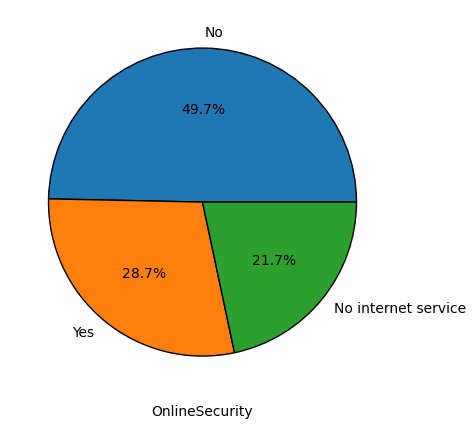

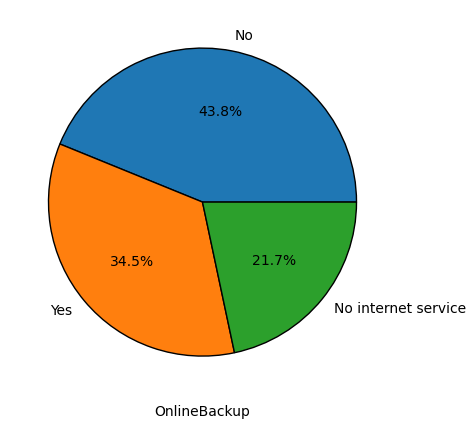

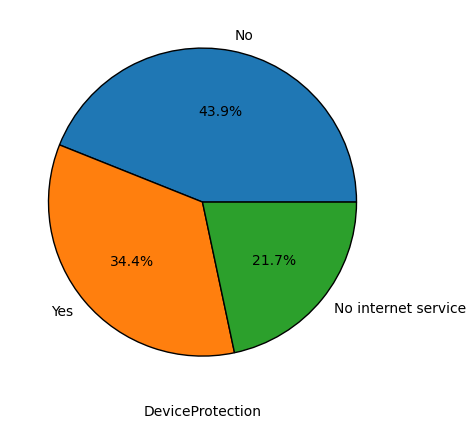

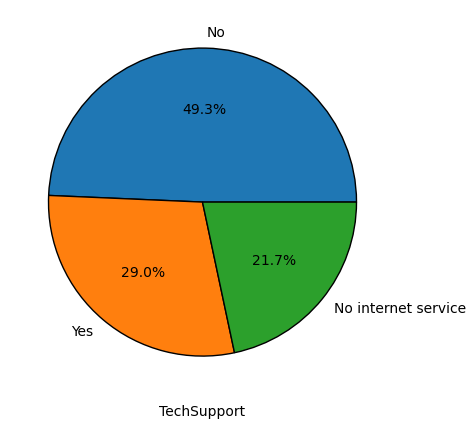

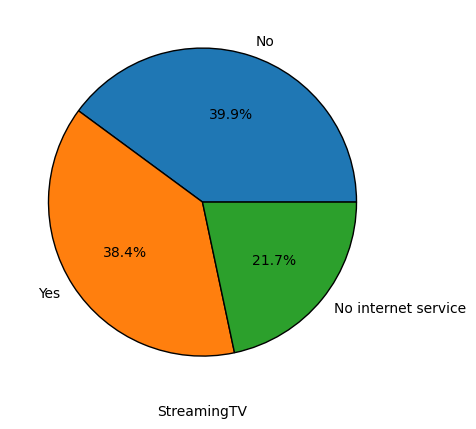

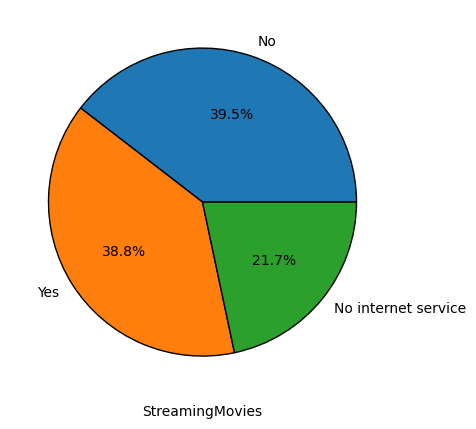

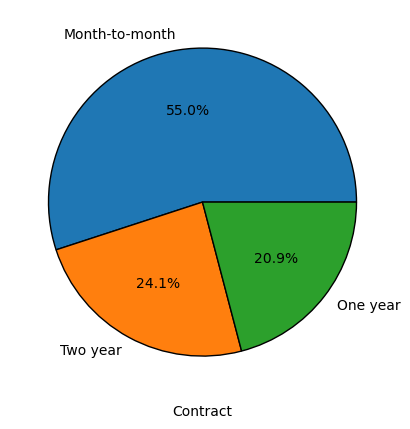

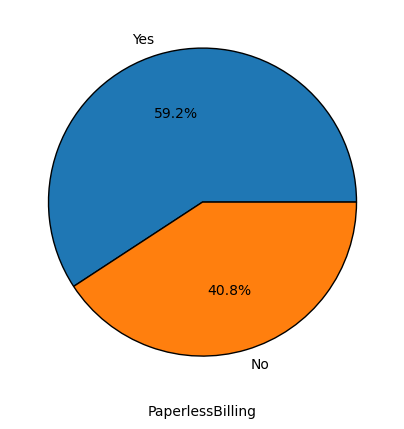

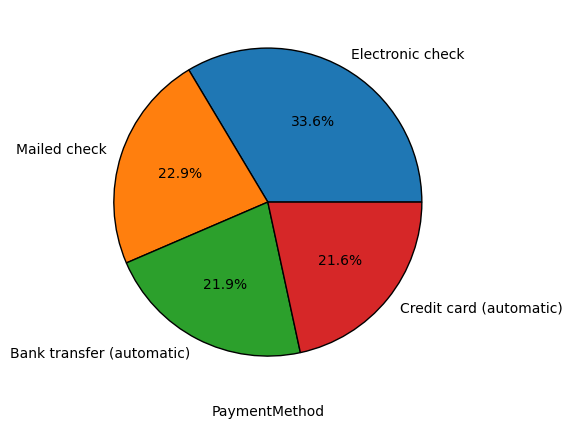

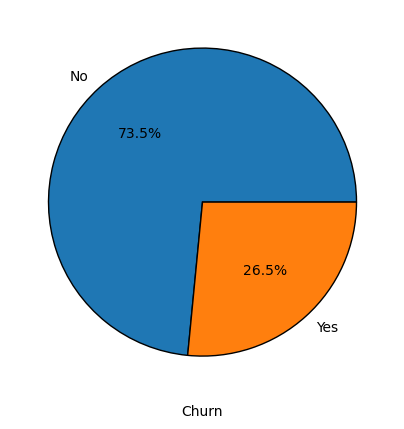

In [33]:
for i in cat:
    plt.figure(figsize=(5,5))
    df[i].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = {"edgecolor" : "Black",'linewidth':1})
    plt.xlabel(i)
    plt.ylabel("")

gender- data of male customers is 1% more compared to female customers.


SeniorCitizen- 16.2% of the customers are SeniorCitizen.


Partner- 51.7% of the customers are with partner.


PhoneService- 9.7% of the customers are not using any phone service.


MultipleLines- 90.3% of the customers are using phone service in which 42.2% have MultipleLines.


InternetService- 44% of customers are using Fiberoptics, 34.4% using DSL whereas remaining 21.7% are not using InternetService.


OnlineSecurity- almost half of the customers (49.7%) are not using any OnlineSecurity.


Churn- 73.5% of data is under 'No' category.

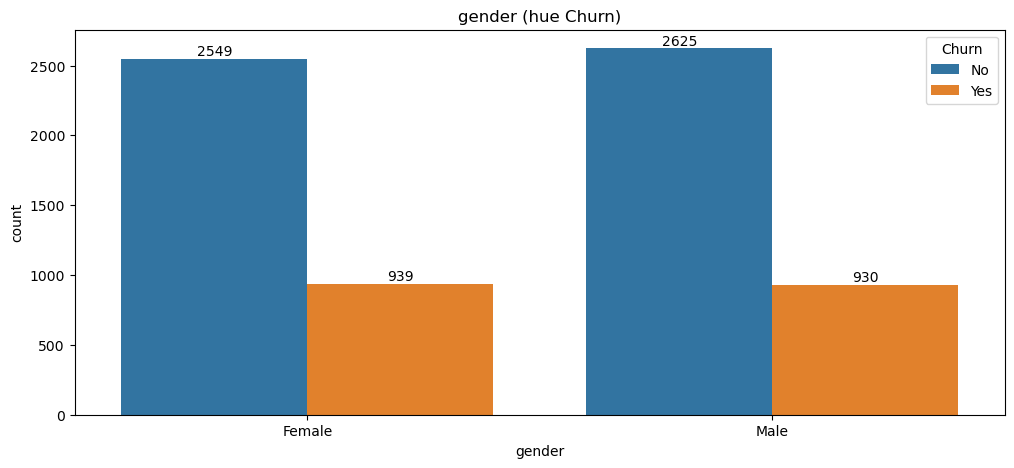

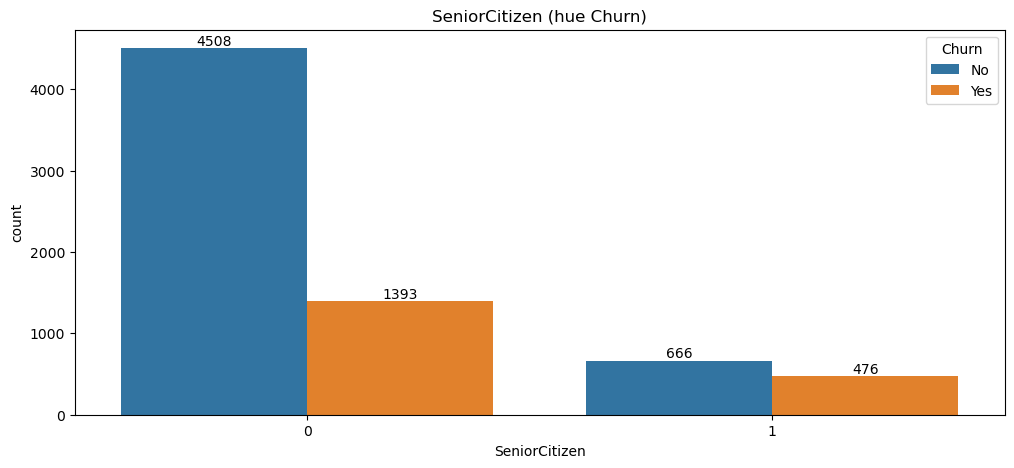

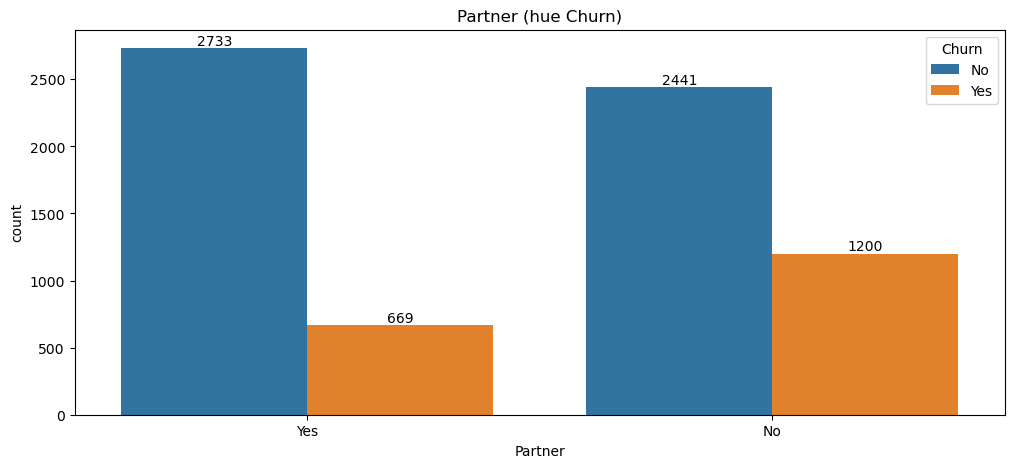

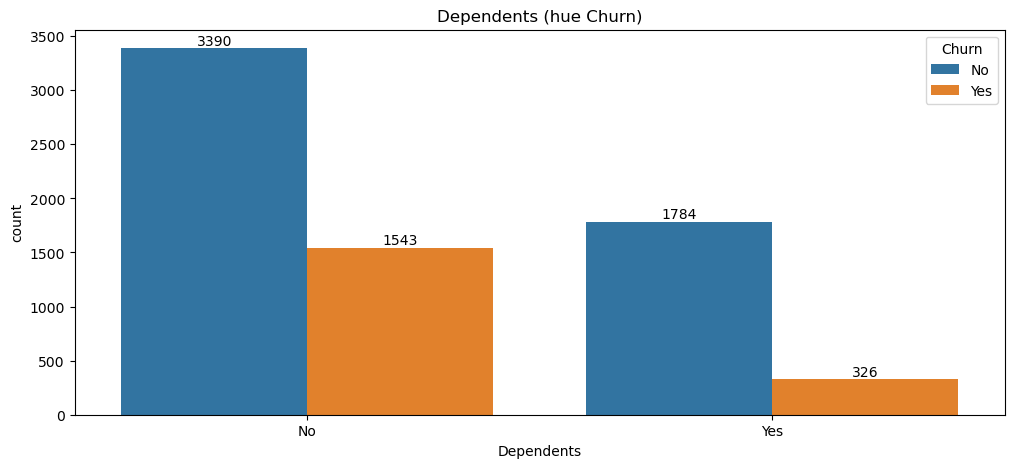

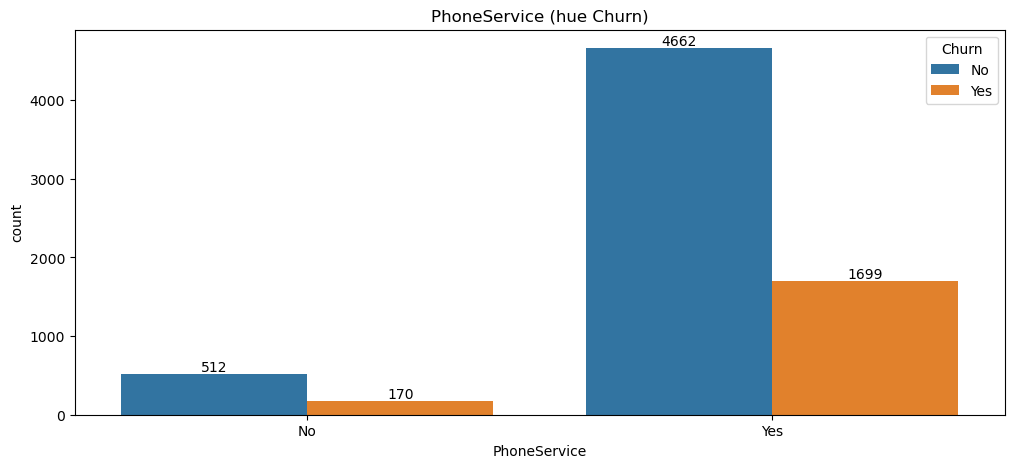

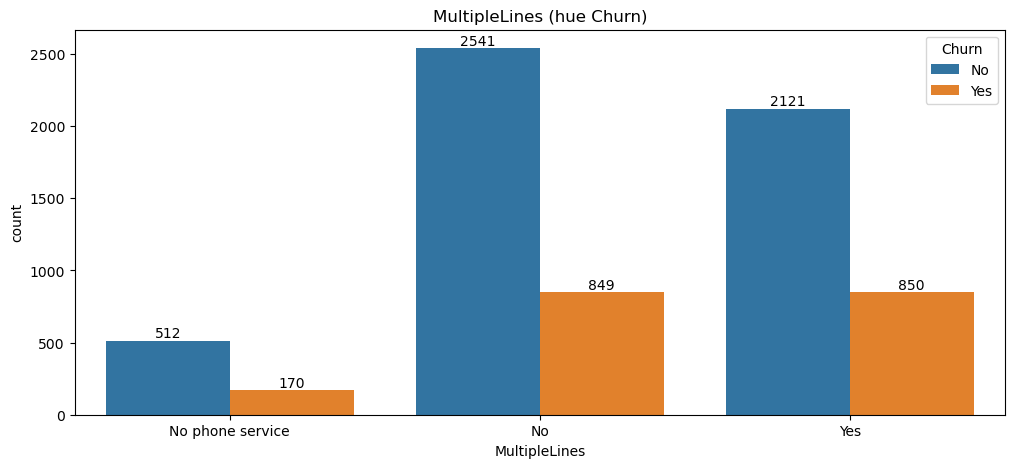

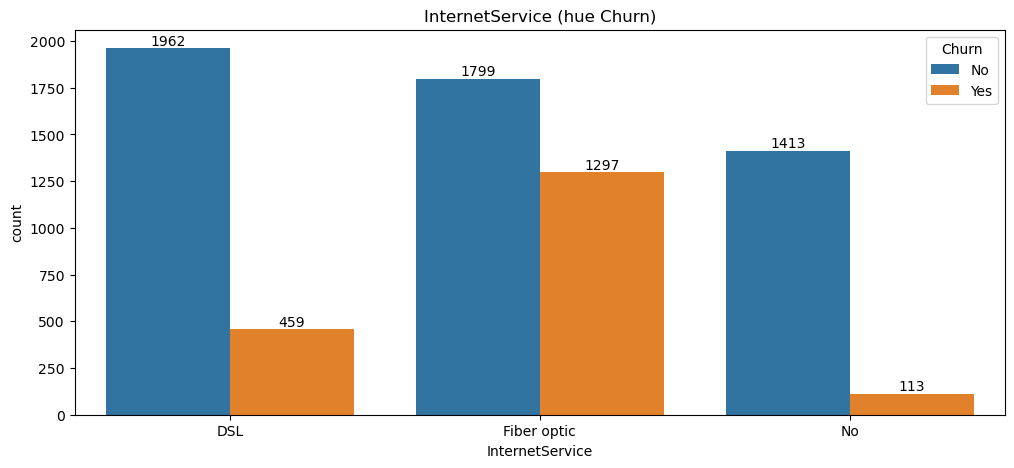

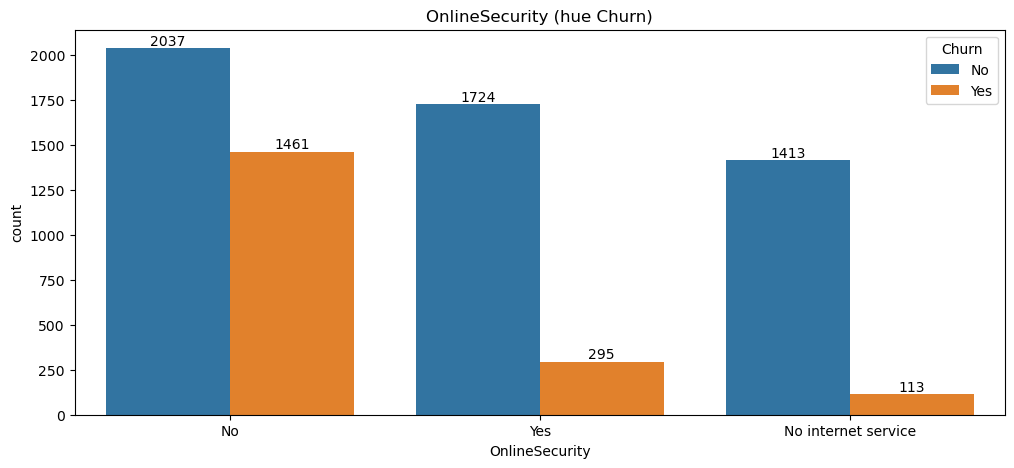

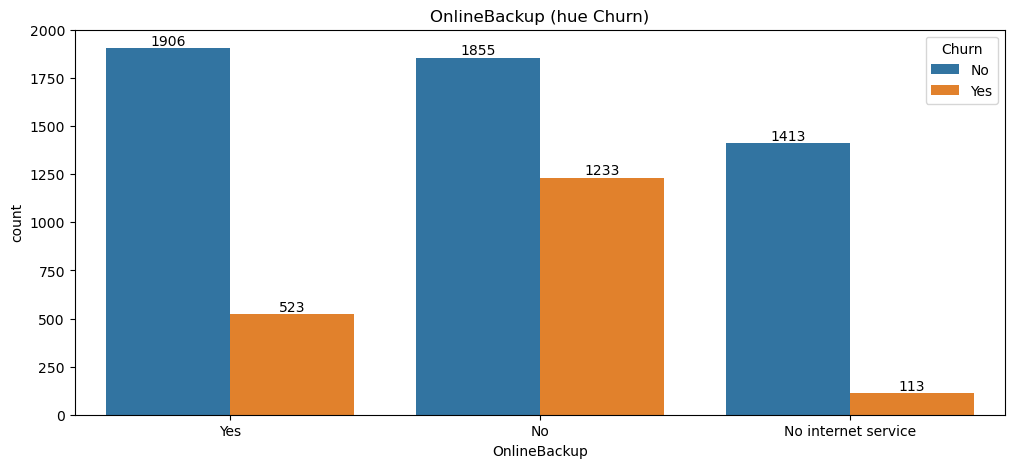

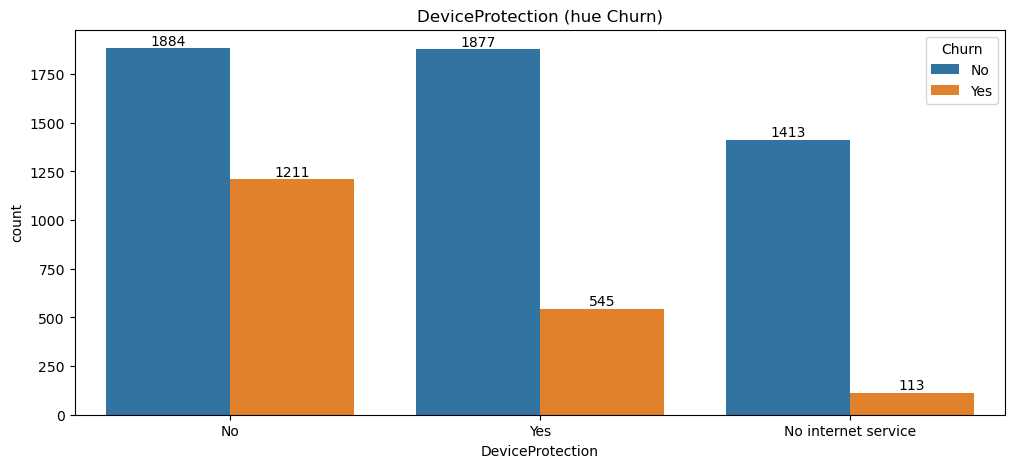

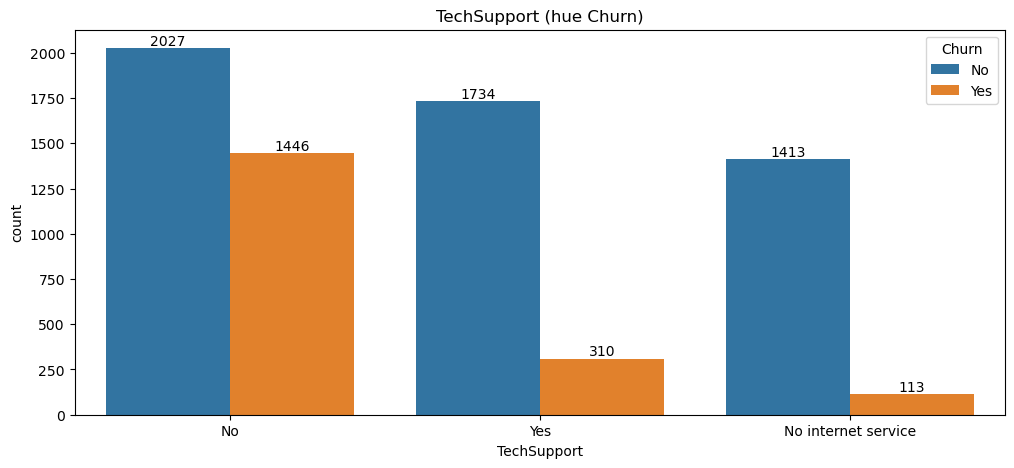

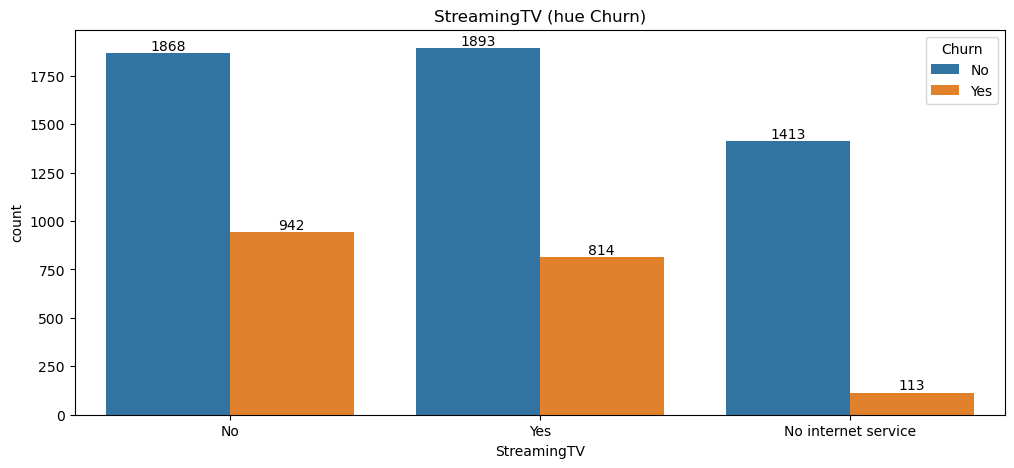

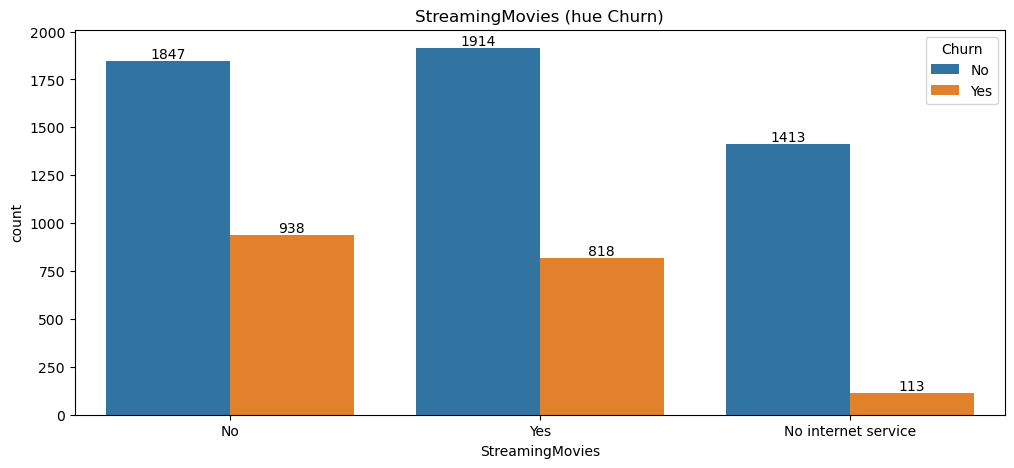

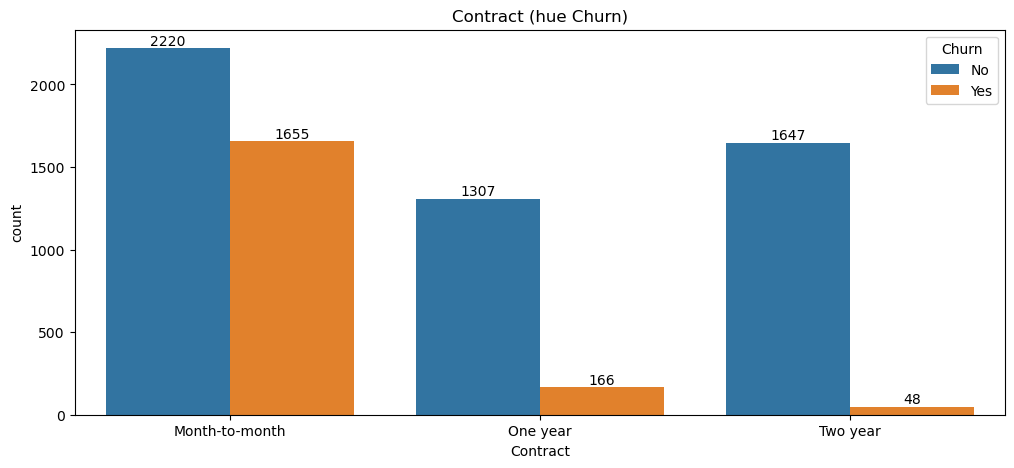

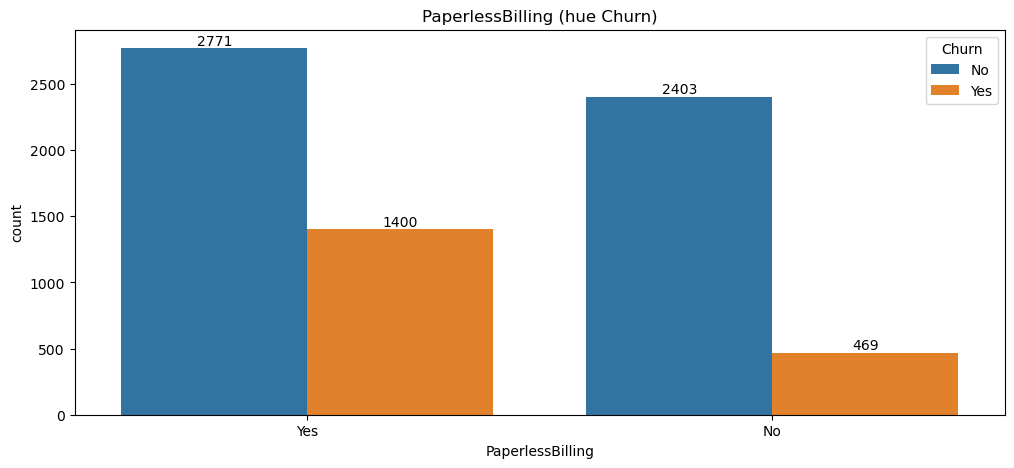

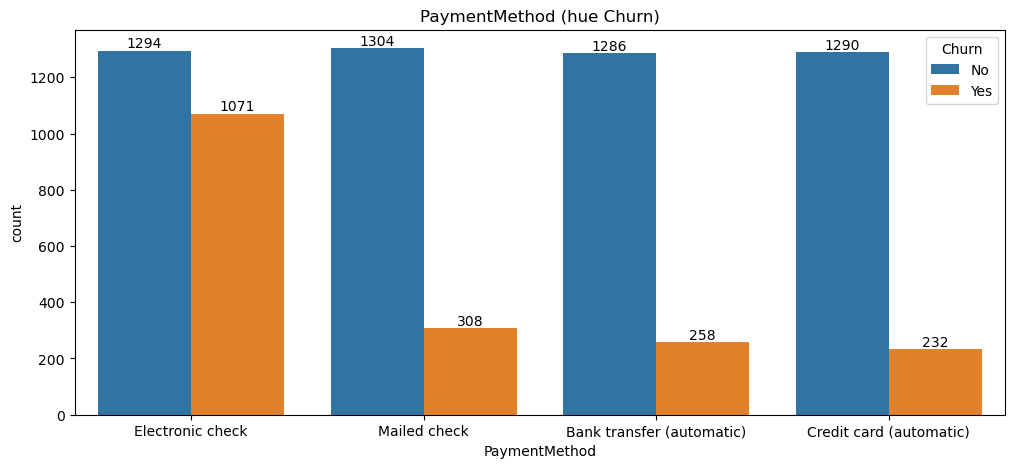

In [34]:
#categorical columns w.r.t target
for i in cat[:-1]:
    plt.figure(figsize=(12,5))

    ax= sns.countplot(x=df[i], hue=df[target])
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.title(i+" (hue Churn)")

InternetService- Customers who are using Fiber optic have high churn.


OnlineSecurity- Customers who are not using any OnlineSecurity have high churn. 


OnlineSecurity- Customers who are not using online security have high churn.


OnlineBackup- Customers without online backup have high churn.


DeviceProtection- Customers without device protection have high churn.


TechSupport- Customers without any TechSupport have high churn.


Contract- Customers who make one or two years contract have very less churn comapred to Month-to-month contract.


PaymentMethod- Electronic check have high churn.

In [35]:
con

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

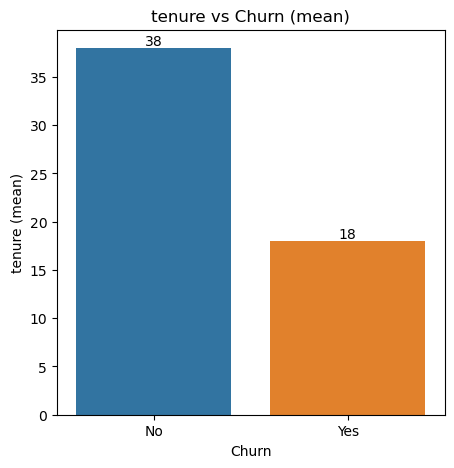

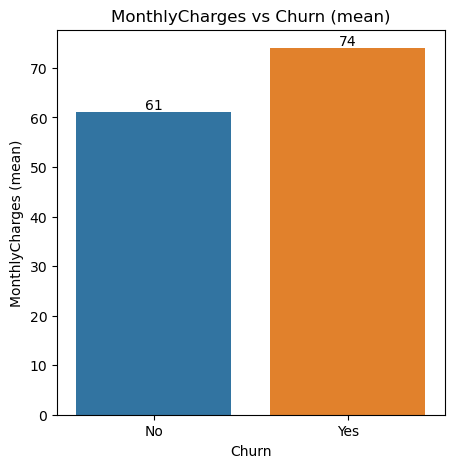

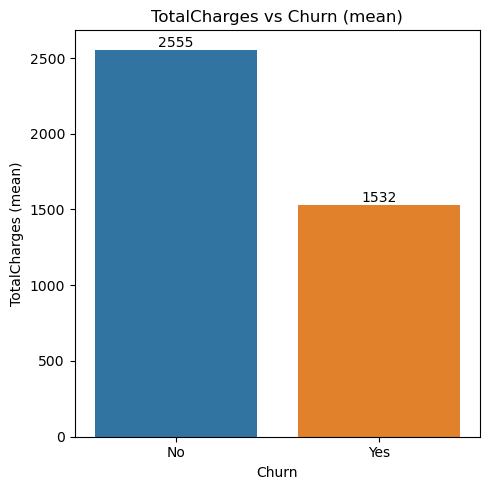

In [36]:
for i in con:
    m=round(df.groupby(target)[i].mean(),0)
    n=round(df.groupby(target)[i].sum(),0)
    plt.figure(figsize=(5,5))
    
    ax=sns.barplot(x=m.index, y=m.values)
    plt.ylabel(i+' (mean)')
    plt.bar_label(ax.containers[0])
    plt.title(i+" vs "+target+ " (mean)")
    
plt.tight_layout()

Less tenure for customers who churn.


MonthlyCharges for customers who churn is more.


Totalcharges for customers who churn is less.


This means that cutomers who don't churn opt for many services and they make contract for longer term which results in less monthly charges due to discounts and high total charges.


In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

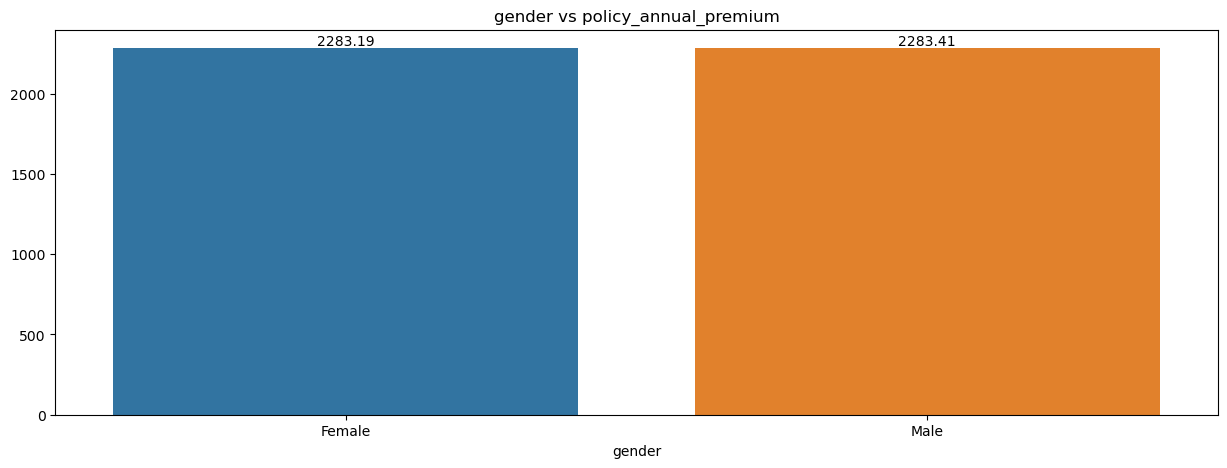

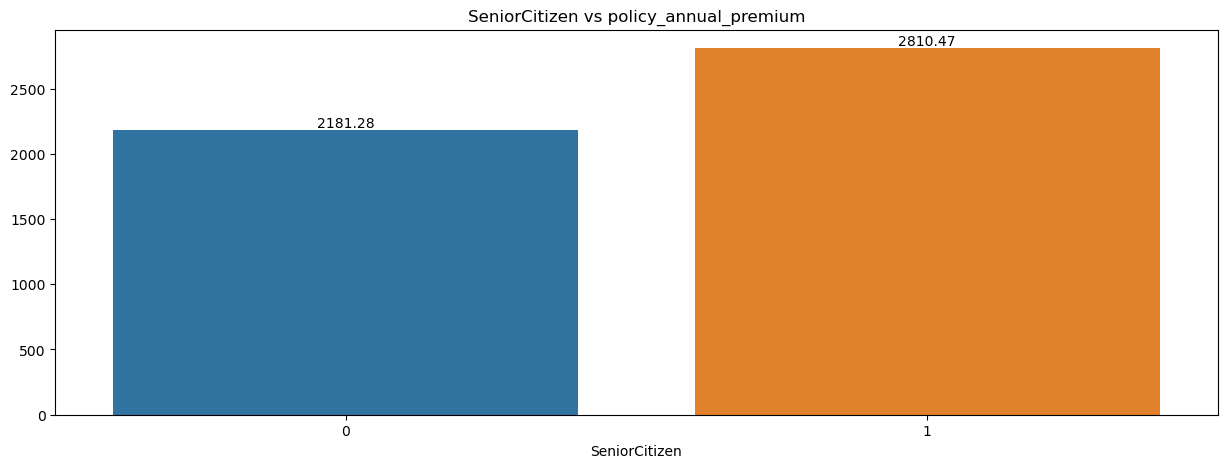

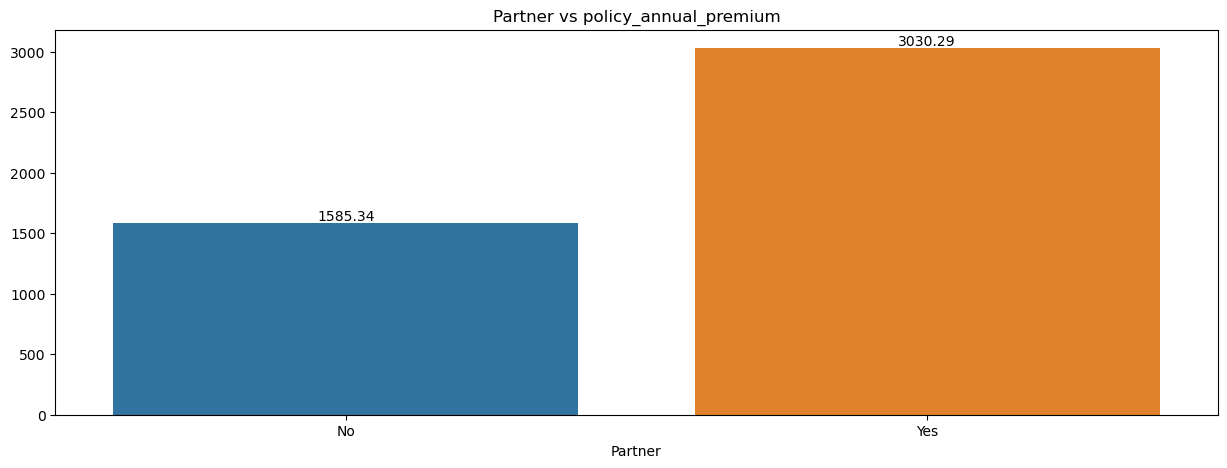

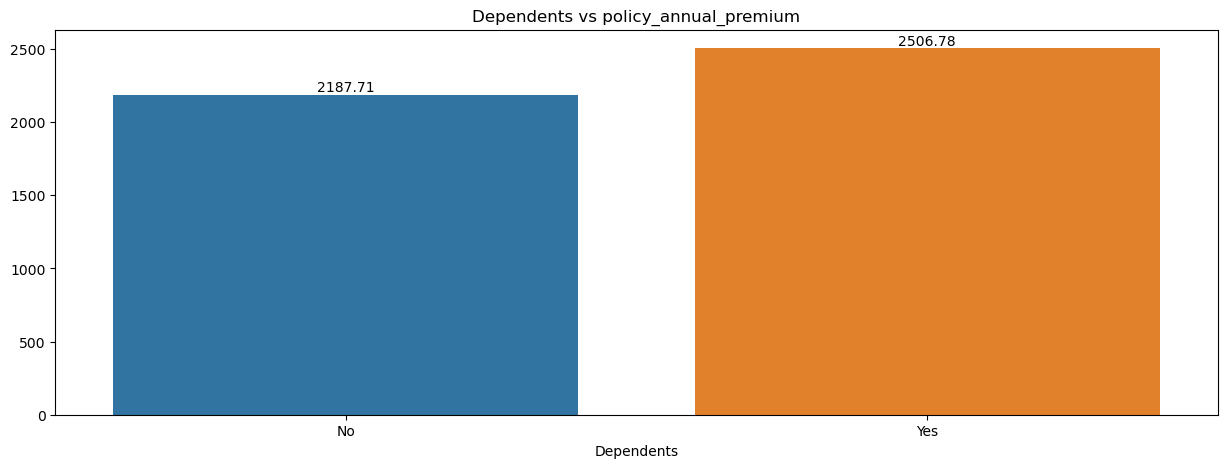

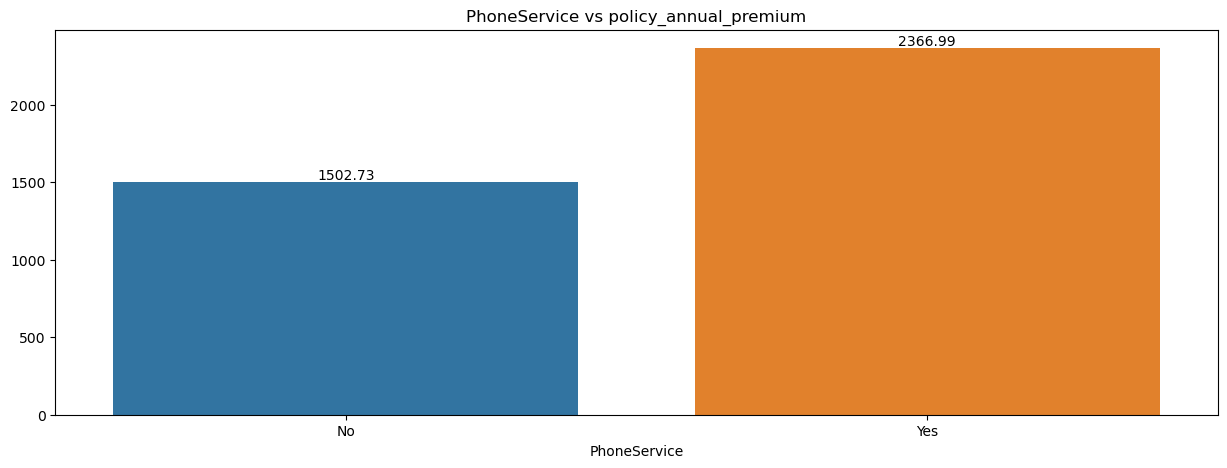

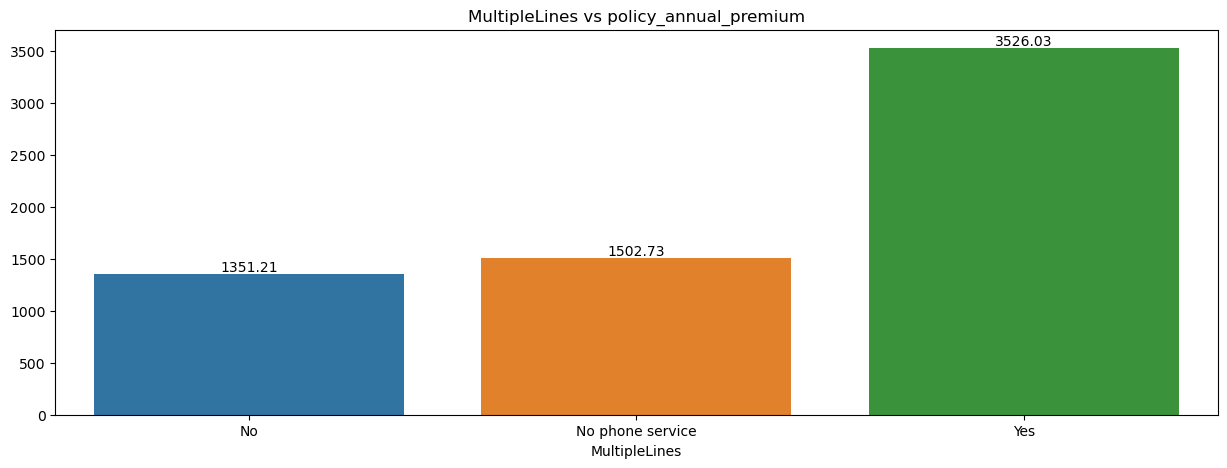

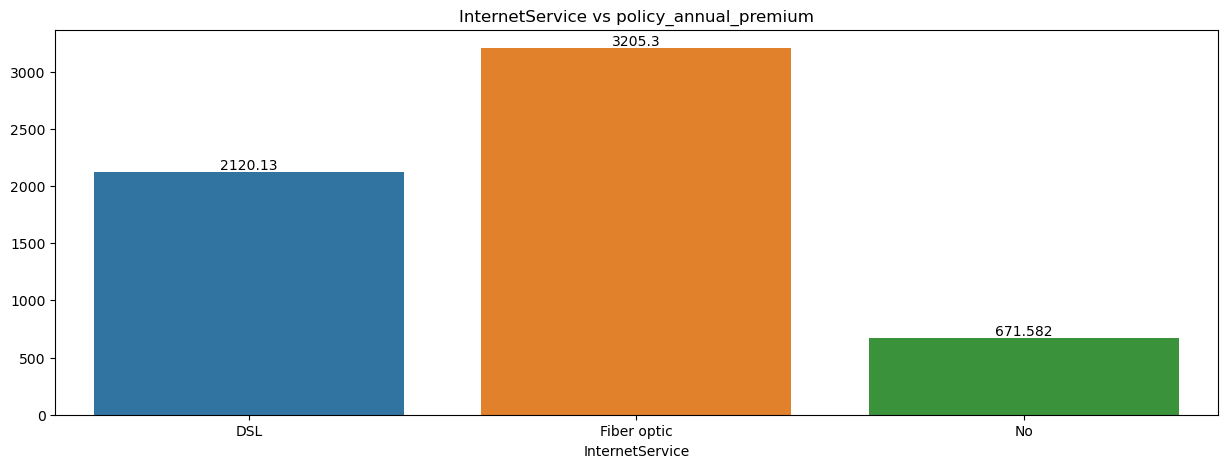

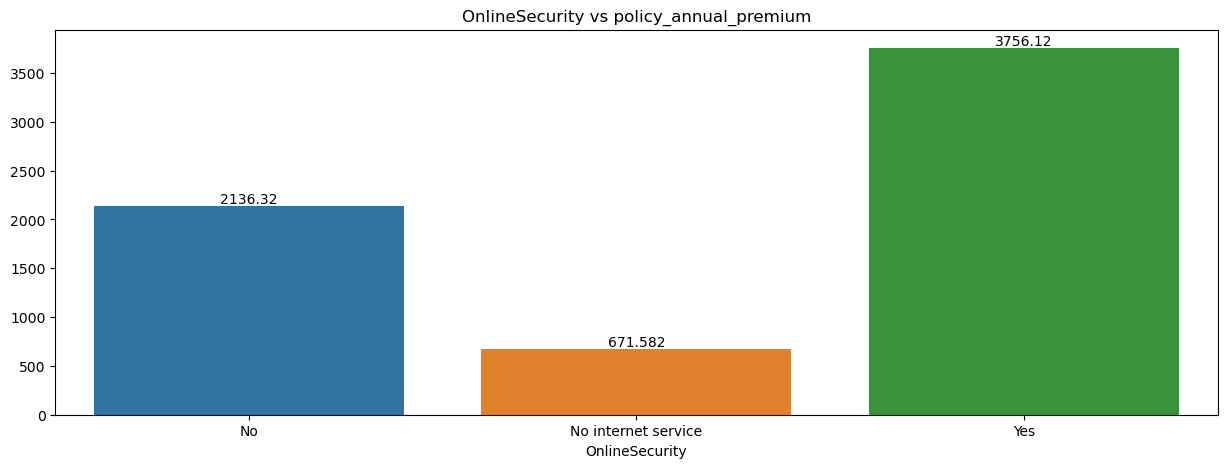

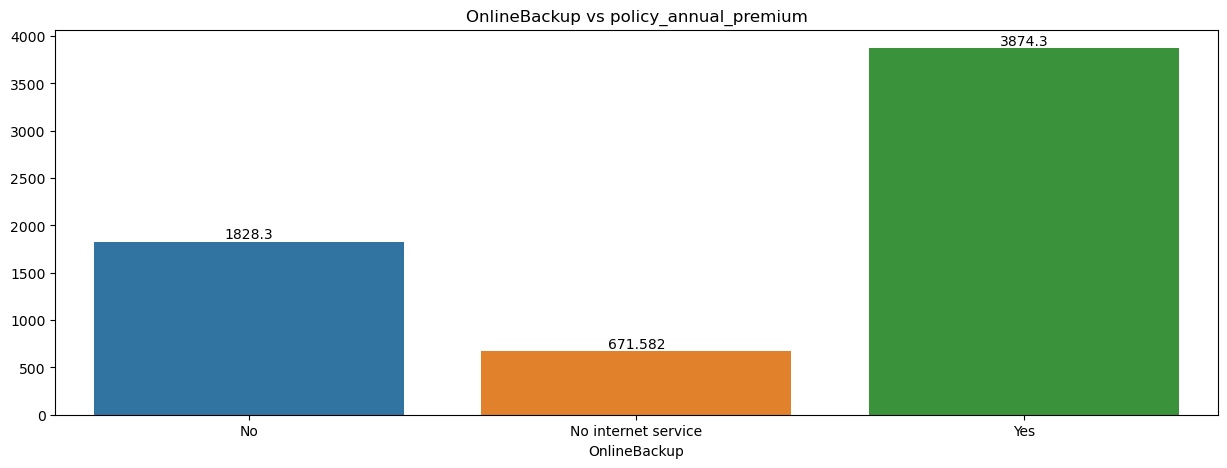

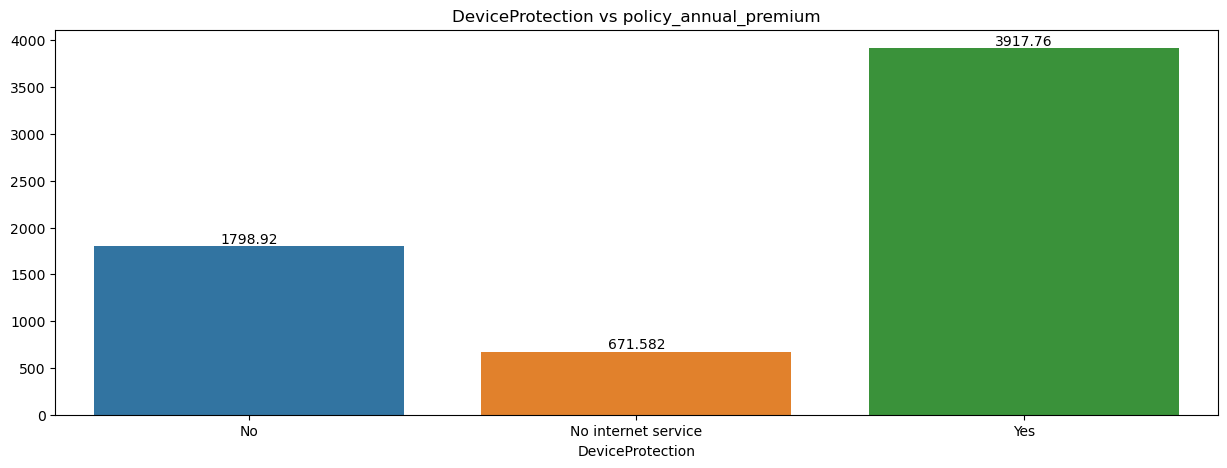

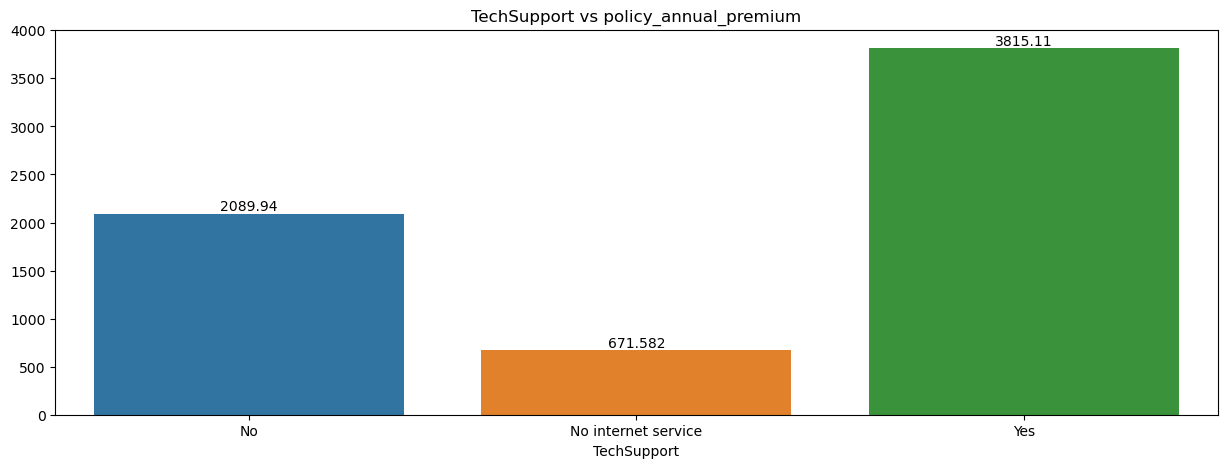

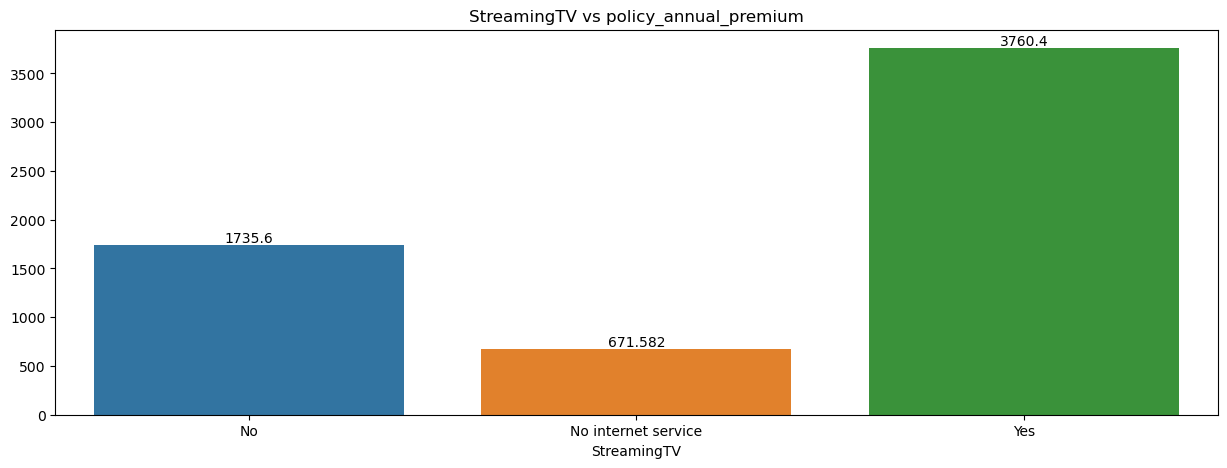

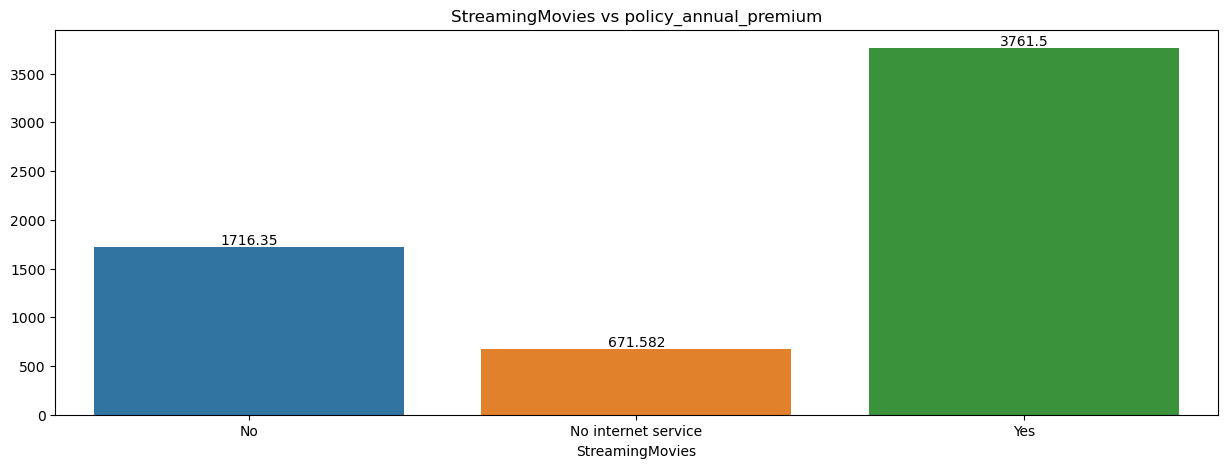

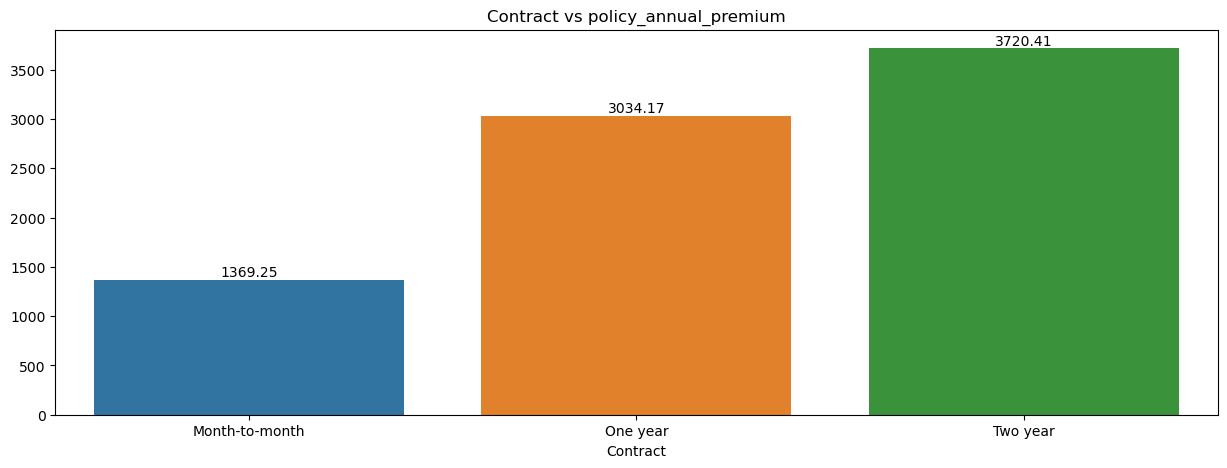

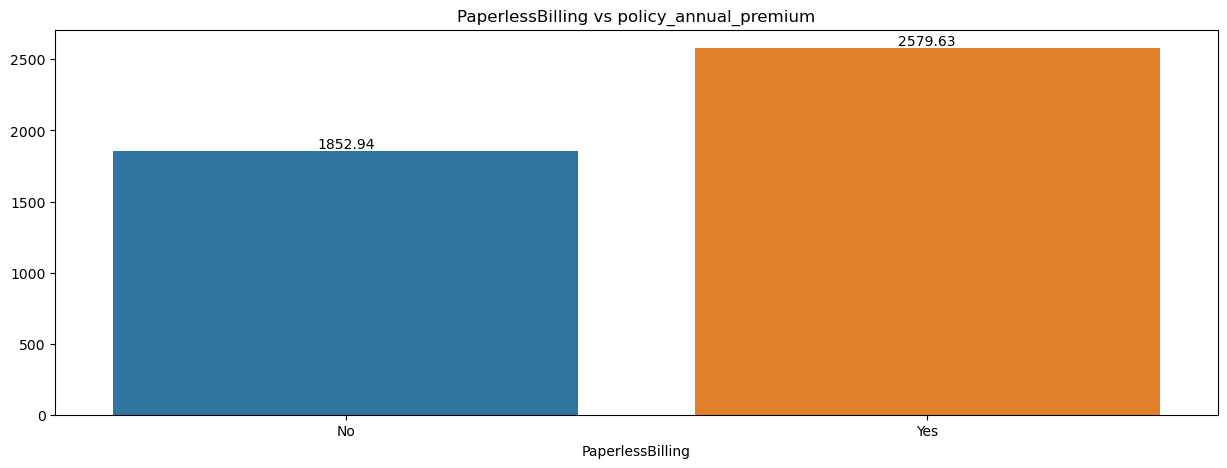

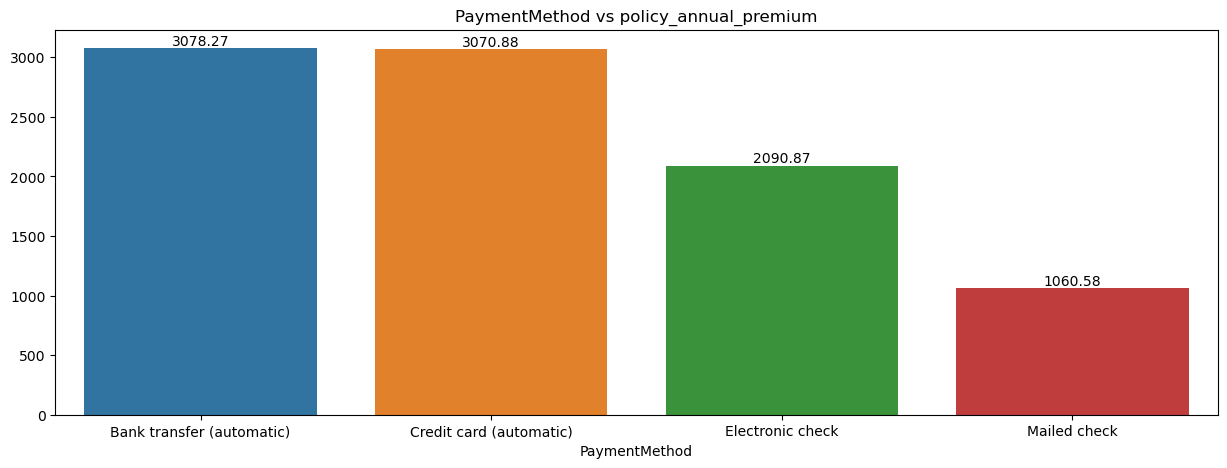

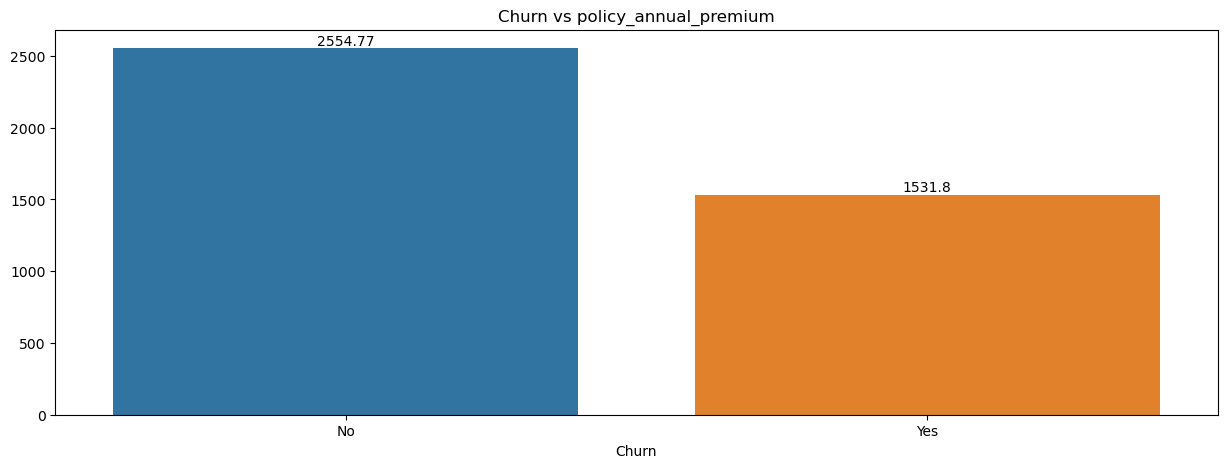

In [38]:

for i in cat:
    m=df.groupby(i)['TotalCharges'].mean()

    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=m.index, y=m.values)
    plt.bar_label(ax.containers[0])
    plt.title(i+" vs policy_annual_premium")
    #plt.xticks(rotation=90)
    plt.show()

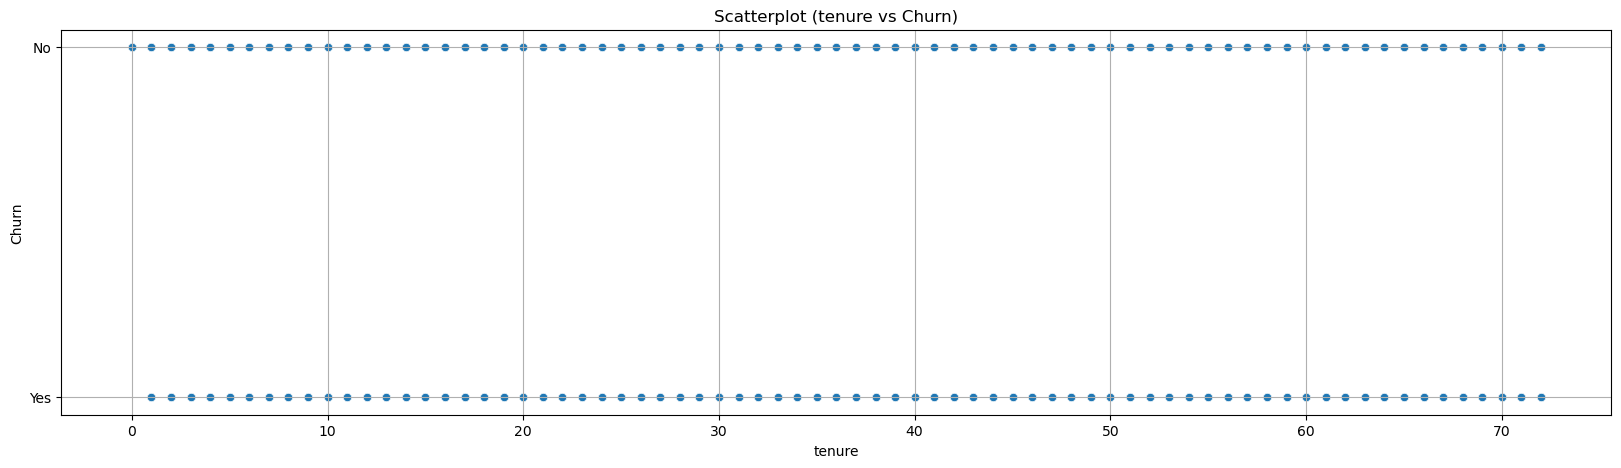

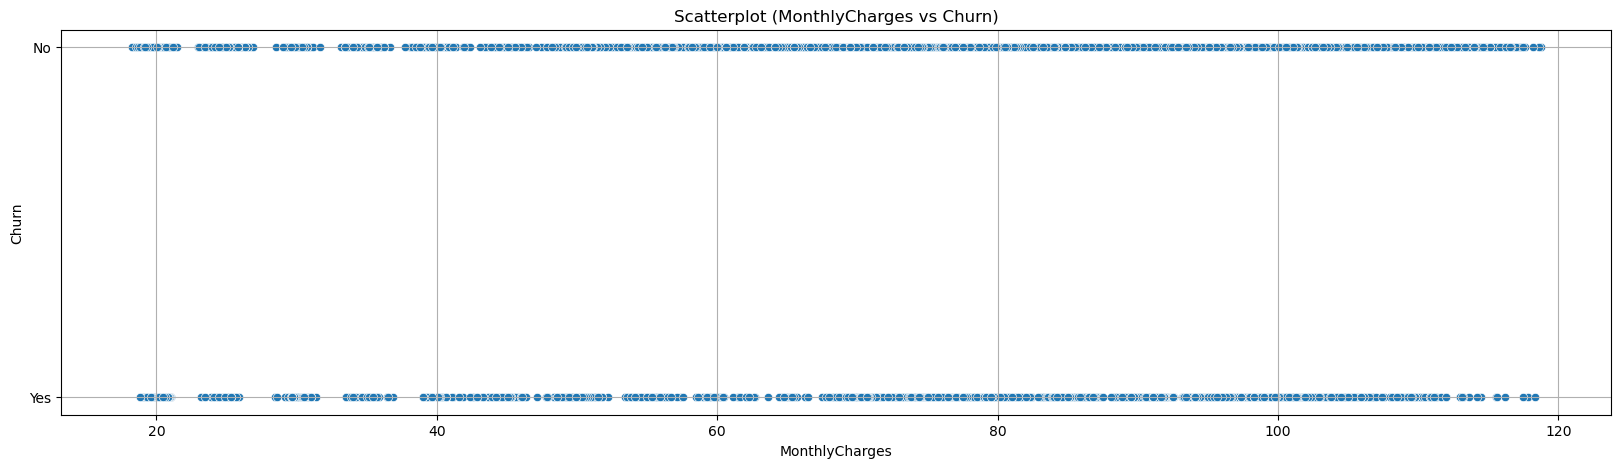

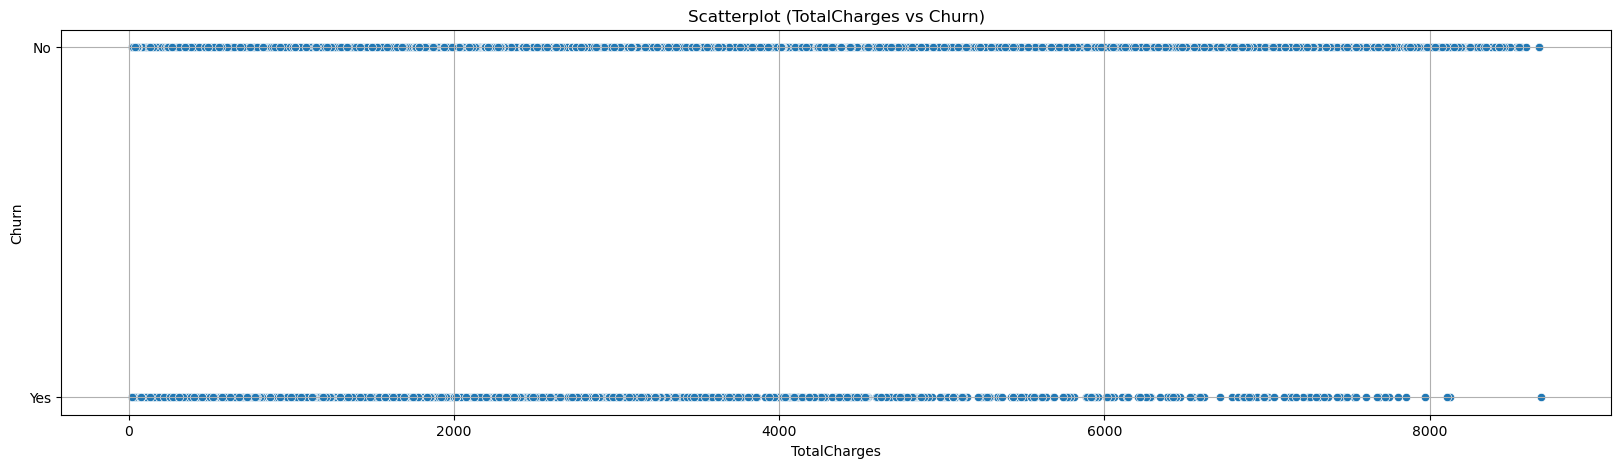

In [39]:
for i in con:
    plt.figure(figsize=(20,5))
    ax=sns.scatterplot(x=df[i],y=df[target])
    plt.title("Scatterplot (" +i+ " vs "+target+")")
    plt.grid()

<Figure size 500x500 with 0 Axes>

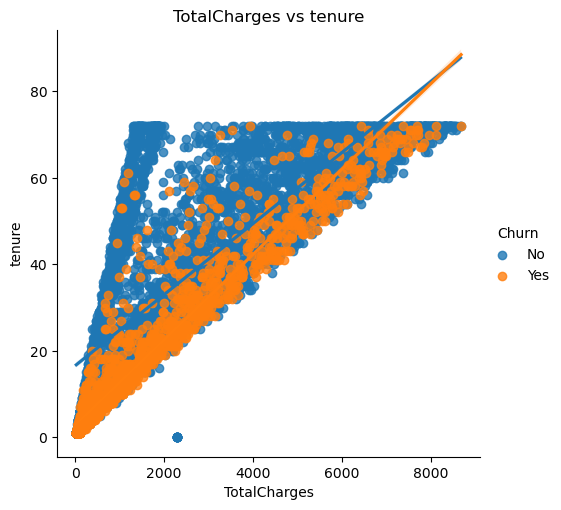

<Figure size 500x500 with 0 Axes>

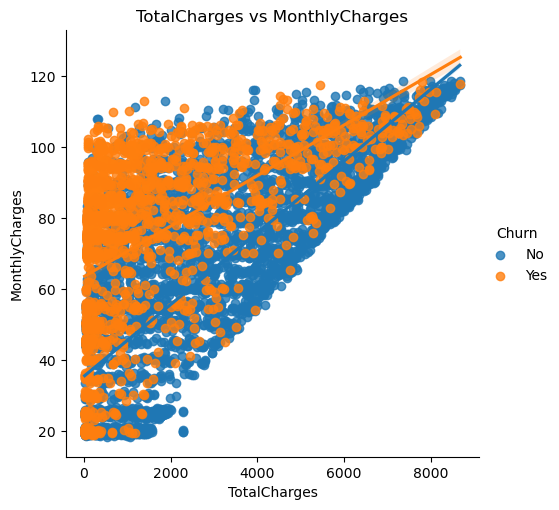

In [40]:
for i in con[:-1]:
    plt.figure(figsize=(5,5))
    sns.lmplot(x="TotalCharges",y=i,data=df,hue="Churn")
    plt.title("TotalCharges vs "+i)

Both the columns are positively related to TotalCharges.

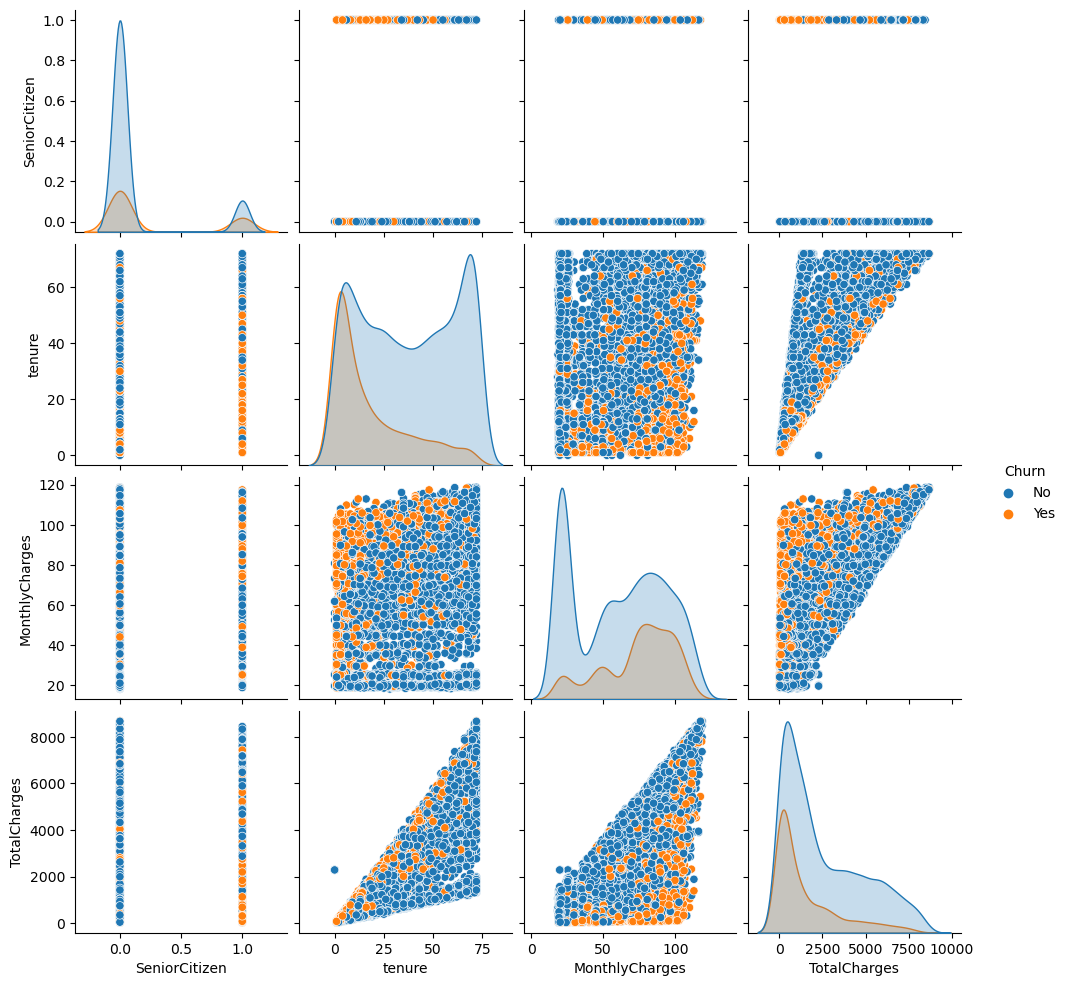

In [41]:
sns.pairplot(df, hue = target)

### Boxplot and outliers

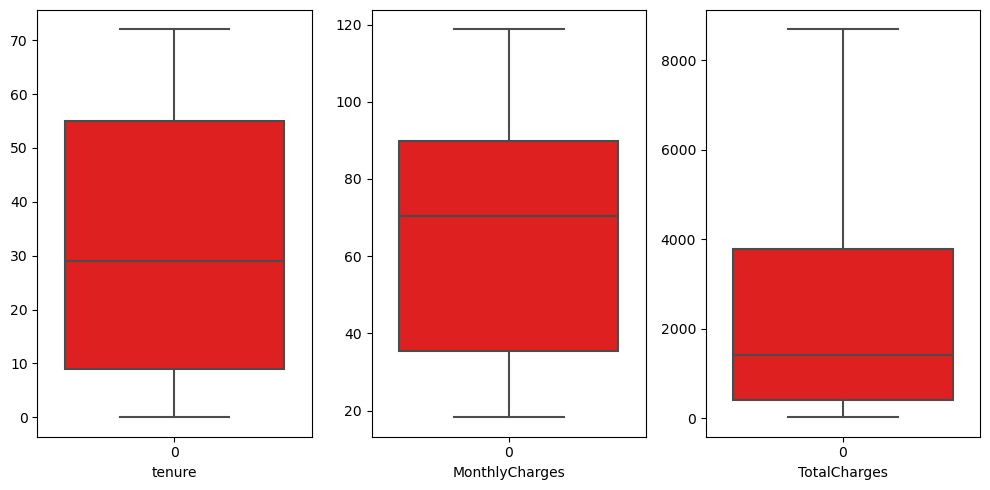

In [42]:
# Boxplot
plt.figure(figsize=(10,5))
c=1 
for i in con:
    plt.subplot(1,3,c)
    sns.boxplot(df[i], orient='v', color= 'red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

There are no outliers in the dataset.

In [43]:
# index of outliers by iqr
ind=[]
for i in con:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    upper= df[i].quantile(0.75) + (IQR * 1.5)
    lower= df[i].quantile(0.25) - (IQR * 1.5)
    
    ind.append(df[df[i]>upper].index)
    ind.append(df[df[i]<lower].index)
    
no=[j for i in range (len(ind)) for j in ind[i]]    #getting all elements from nested 'ind' list

# there are possibilities that several indexes are repeated in the list.
len(set(no))

0

In [44]:
#zscore
from scipy.stats import zscore

z = zscore(df[con])
t=np.abs(z)
# taking thresold value = 3

df2 = df[(t<3).all(axis = 1)]
df2.shape

(7043, 20)

In [45]:
l=df.shape[0]-df2.shape[0]
l

0

In [46]:
#Percentage of data loss
print("By IQR, the percent of data loss is {0}".format(len(set(no))/df.shape[0]*100))
print()
print("By z-score, the percent of data loss is {0}".format(l/df.shape[0]*100))

By IQR, the percent of data loss is 0.0

By z-score, the percent of data loss is 0.0


We can see that no outliers are present in continuous data.

### Skewness

In [47]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
df2[con].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

from above we can see that only SeniorCitizen and TotalCharges are highly skewed. we need to perform transformation on them.

In [49]:
# PowerTransformation

from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [50]:
x_pw = pw.fit_transform(df[['TotalCharges']])
df3 = pd.DataFrame(x_pw, columns =['TotalCharges'])

In [51]:
df3

,TotalCharges
0,-1.810588
1,0.253313
2,-1.387269
3,0.232253
4,-1.250118
...,...
7038,0.295688
7039,1.567097
7040,-0.859899
7041,-0.922968


In [52]:
df3.skew()

TotalCharges   -0.144899
dtype: float64

In [53]:
df2[['TotalCharges']]=df3

In [54]:
df2[con].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

skewness is reduced.

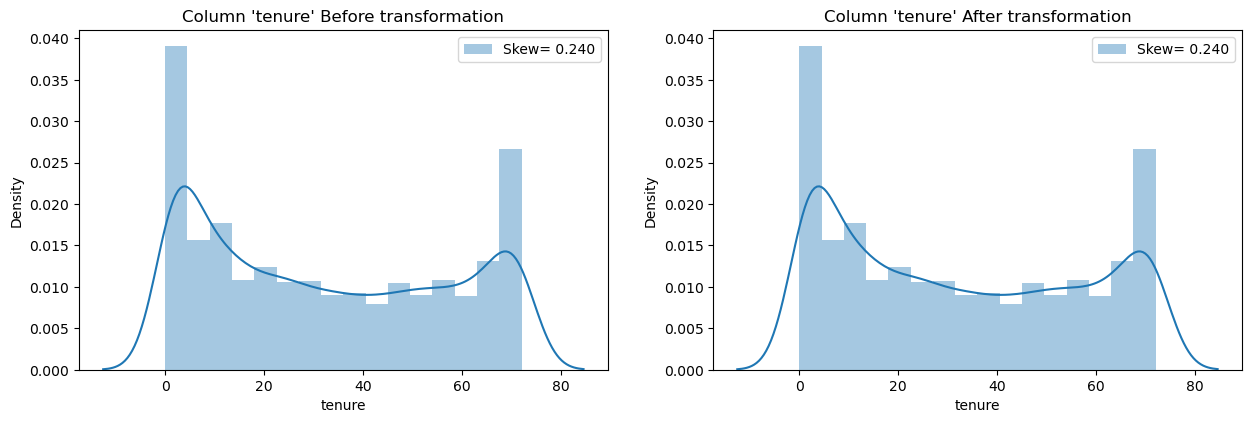

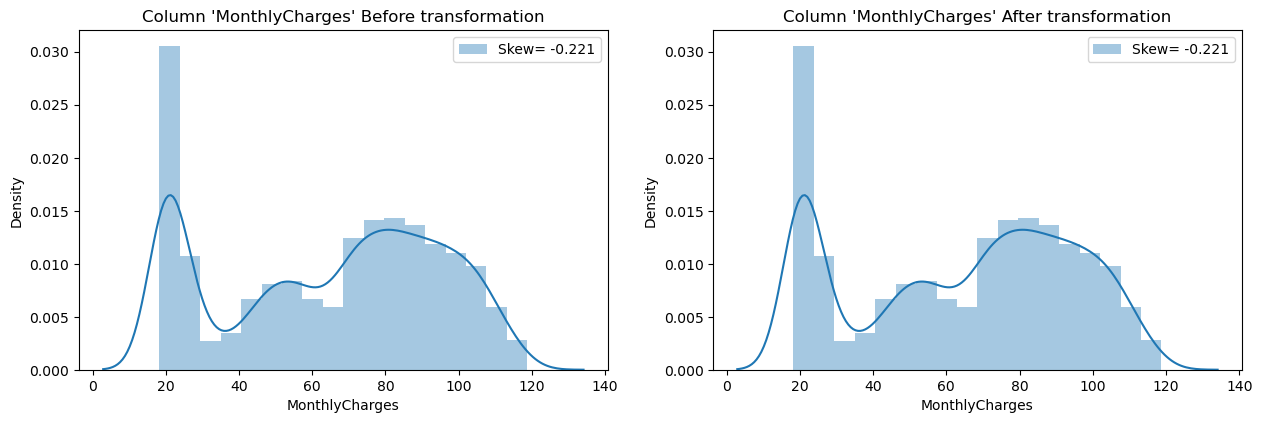

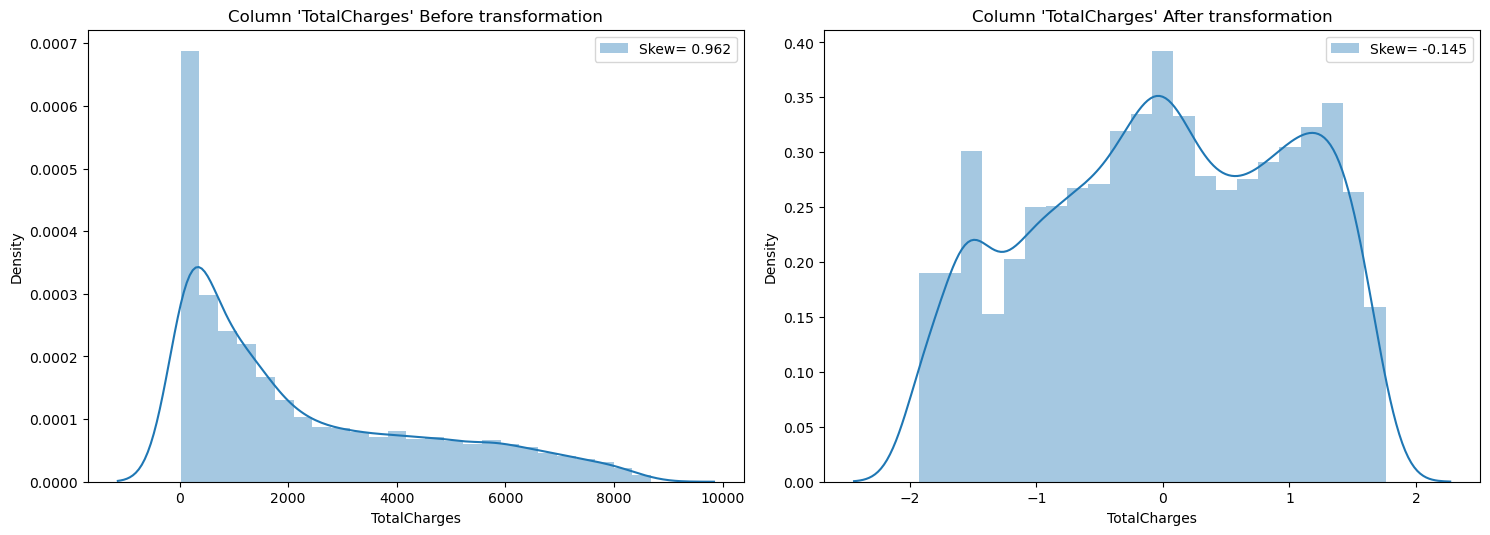

In [55]:
# Distribution plot and skewness
c=1
for i in df2[con]:
    plt.figure(figsize=(15,15))
    
    plt.subplot(3,2,c)
    skew= df[i].skew()
    sns.distplot(df[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' Before transformation")
    
    plt.subplot(3,2,c+1)
    skew= df2[i].skew()
    sns.distplot(df2[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' After transformation")
    
    c+=2
    
plt.tight_layout()

#### Encoding

In [56]:
for i in cat:
    print(i)
    print(df[i].unique())
    print()

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



In [64]:
from sklearn.preprocessing import OrdinalEncoder
ordn = OrdinalEncoder()
for i in cat:
    df2[i] = ordn.fit_transform(df2[i].values.reshape(-1,1))

In [65]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for i in cat:
#     print("Encoding",i)
#     df2[i]= le.fit_transform(df2[i])
    
# print("Done")

In [66]:
# x= pd.get_dummies(data = df2, columns = cat)
# x.shape

In [67]:
df2.shape

(7043, 20)

In [68]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0


In [69]:
#check if any object datatype present in the dataset
print(df2.select_dtypes(exclude= 'number').columns)

Index([], dtype='object')


### Collinearity and multicollinearity

In [70]:
df2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


<AxesSubplot: >

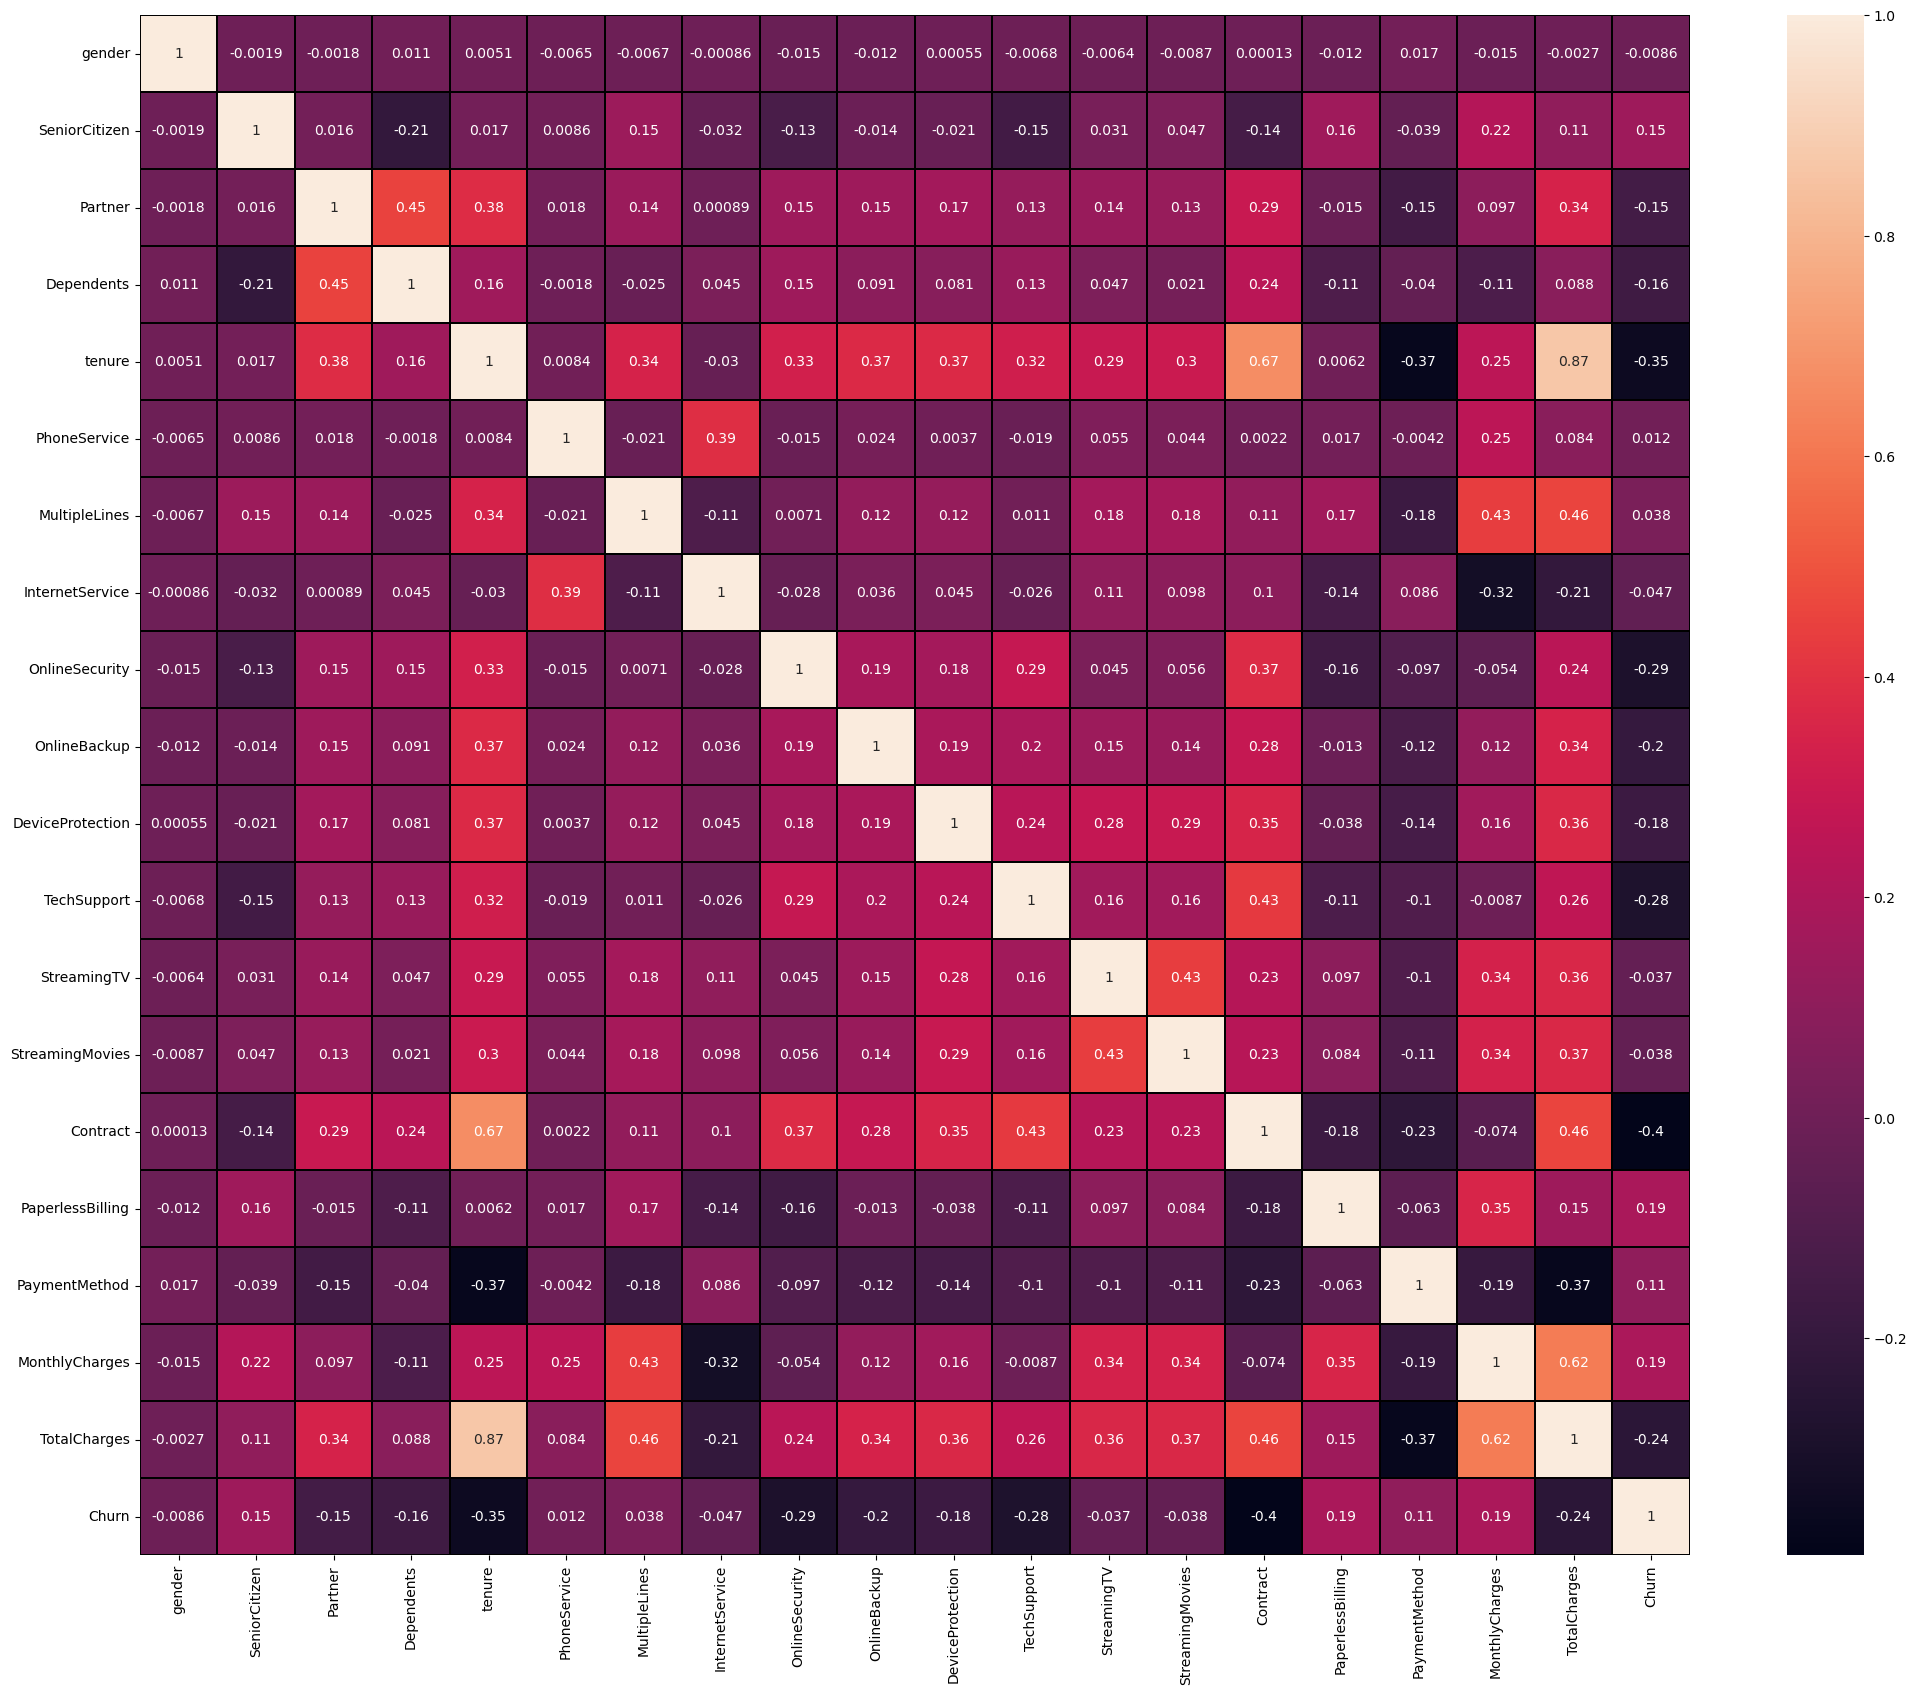

In [71]:
plt.figure(figsize=(25,20))
sns.heatmap(df2.corr(), annot=True, linewidth=0.2, linecolor='black')

Tenure and TotalCharges are very strongly correlated. 

TotalCharges and MonthlyCharges have strong correlation

### Splitting data into features and target variables

In [72]:
x= df2.drop(target, axis=1)
y=df2[target]

print(x.shape, y.shape)

(7043, 19) (7043,)


### Variance Inflation Factor

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
def vif_(x1):
    vif= pd.DataFrame()
    vif['Features']= x1.columns
    vif['VIF']= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    print(vif)

In [75]:
vif_(x)

            Features        VIF
0             gender   1.991775
1      SeniorCitizen   1.369661
2            Partner   2.821142
3         Dependents   1.960324
4             tenure  13.453741
5       PhoneService  15.858033
6      MultipleLines   2.753032
7    InternetService   4.467179
8     OnlineSecurity   2.266778
9       OnlineBackup   2.435558
10  DeviceProtection   2.623697
11       TechSupport   2.392239
12       StreamingTV   3.235588
13   StreamingMovies   3.256669
14          Contract   4.183657
15  PaperlessBilling   2.916834
16     PaymentMethod   3.515943
17    MonthlyCharges  16.440490
18      TotalCharges   4.457306


We got 'tenure', 'PhoneService', and 'MonthlyCharges' with high VIF score. we need to delete highest ViF first and then check the VIF. We need to repeat the process till VIF of all columns are within range.

In [76]:
# dropping column 'MonthlyCharges'
x= x.drop('MonthlyCharges',axis=1)
vif_(x)

            Features        VIF
0             gender   1.974952
1      SeniorCitizen   1.341493
2            Partner   2.816243
3         Dependents   1.958561
4             tenure  13.319478
5       PhoneService   8.170505
6      MultipleLines   2.441956
7    InternetService   3.611579
8     OnlineSecurity   2.265555
9       OnlineBackup   2.415186
10  DeviceProtection   2.588073
11       TechSupport   2.391319
12       StreamingTV   3.025522
13   StreamingMovies   3.039596
14          Contract   4.017289
15  PaperlessBilling   2.633051
16     PaymentMethod   3.427763
17      TotalCharges   4.003584


In [77]:
# dropping column 'tenure'
x= x.drop('tenure',axis=1)
vif_(x)

            Features       VIF
0             gender  1.933021
1      SeniorCitizen  1.336576
2            Partner  2.747843
3         Dependents  1.958373
4       PhoneService  7.828678
5      MultipleLines  2.400107
6    InternetService  3.475321
7     OnlineSecurity  2.209723
8       OnlineBackup  2.356165
9   DeviceProtection  2.574535
10       TechSupport  2.379400
11       StreamingTV  3.022259
12   StreamingMovies  3.039134
13          Contract  3.023584
14  PaperlessBilling  2.580135
15     PaymentMethod  3.371842
16      TotalCharges  2.188791


VIF is now in the range for every column

### Scaling

In [78]:
con

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [79]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = scaler.fit_transform(x)

In [80]:
x

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.81058786],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261,  0.25331304],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -1.38726921],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -0.85989943],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261, -0.92296815],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  1.48444325]])

#### Oversampling using SMOTE

In [81]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [84]:
x.shape, y.shape

((10348, 17), (10348,))

In [85]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

#### Model

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [129]:
mdl, acc, rs, tr, cvsc= [],[],[],[],[]

# function to get best random_state
def prediction(model, ran):
    acctr=0
    acct=0
    r=0
    
    for i in range (ran):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=i, stratify =y)
            
        model.fit(x_train, y_train)     #train model
        y_tr= model.predict(x_train)    #prediction on train
        y_pred=model.predict(x_test)    #prediction on test
        
        pred_tr= accuracy_score(y_train, y_tr)    #R2 score of train
        pred_test= accuracy_score(y_test,y_pred)       #R2 score of test
    
    #sort randomstate at which train and test score difference is 1.
        margin=np.abs(round(pred_tr*100)-round(pred_test*100))
        
        if pred_test>acct or pred_tr>acctr:
            if ((margin<=1) and (round(pred_test*100)>=75)):   
                print("at random state", i)
                print("Accuracy of train is ",pred_tr*100)
                print("Accuracy of test is ",pred_test*100)
                print("-x"*20)
                print()
                
                #if pred_tr>acctr:
                acctr= pred_tr
                    
                #elif pred_test>acct:
                acct= pred_test
    
    print("Best Random_states sorted.")

    
# function to get score at the best random_state
def final(model, best_rs):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=best_rs, stratify =y)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test
    
    pred_tr= accuracy_score(y_train, y_tr)    # score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test
    
    print("at random state", best_rs)
    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
          
    #saving the data
    tr.append(pred_tr)
    acc.append(pred_test)
    rs.append(best_rs)
    


def cv_score(model, x, y, rng):    # cross val score of the model
    cvsco=0
    for val in range(2,rng):
        cv = cross_val_score(model, x, y, cv = val).mean()
        print('cross_val_score', cv*100,'at cv =', val)
        if cvsco<cv*100:
            cvsco=cv*100
    cvsc.append(cvsco)        
    
        

#### LogisticRegression

In [130]:
lr= LogisticRegression()
prediction(lr, 50)

at random state 0
Accuracy of train is  75.4797735744857
Accuracy of test is  76.13526570048309
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  75.86635372083391
Accuracy of test is  75.52334943639292
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  75.18983846472456
Accuracy of test is  76.23188405797102
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  75.76970868424687
Accuracy of test is  75.29790660225443
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 12
Accuracy of train is  75.68687008145795
Accuracy of test is  75.61996779388083
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 13
Accuracy of train is  75.7006765152561
Accuracy of test is  75.33011272141707
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 14
Accuracy of train is  75.75590225044871
Accuracy of test is  75.49114331723027
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 18
Accurac

Best accuracy is at random_state 6

In [131]:
#final metrics
final(lr,6)
mdl.append("LogisticRegression")

at random state 6
Accuracy of train is  75.86635372083391
Accuracy of test is  75.52334943639292

Confusion Matrix
[[1101  452]
 [ 308 1244]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      1553
         1.0       0.73      0.80      0.77      1552

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.75      3105
weighted avg       0.76      0.76      0.75      3105



In [132]:
cv_score(lr,x,y,25)

cross_val_score 75.2899110939312 at cv = 2
cross_val_score 75.35765460267837 at cv = 3
cross_val_score 75.47352145342096 at cv = 4
cross_val_score 75.3866578874249 at cv = 5
cross_val_score 75.37699093222145 at cv = 6
cross_val_score 75.35771436099988 at cv = 7
cross_val_score 75.41562521292275 at cv = 8
cross_val_score 75.37691670555787 at cv = 9
cross_val_score 75.45428381876116 at cv = 10
cross_val_score 75.45435018098776 at cv = 11
cross_val_score 75.42554659683705 at cv = 12
cross_val_score 75.5121762659451 at cv = 13
cross_val_score 75.48320019226651 at cv = 14
cross_val_score 75.47380156075809 at cv = 15
cross_val_score 75.47392167230514 at cv = 16
cross_val_score 75.50271469749424 at cv = 17
cross_val_score 75.50290360046456 at cv = 18
cross_val_score 75.46402348964695 at cv = 19
cross_val_score 75.43524043524043 at cv = 20
cross_val_score 75.52211801457337 at cv = 21
cross_val_score 75.49357924002184 at cv = 22
cross_val_score 75.47397867510195 at cv = 23
cross_val_score 75.48

#### DecisionTreeClassifier

In [133]:
dt=DecisionTreeClassifier()
prediction(dt,200)

Best Random_states sorted.


DecisionTree is not feasible.
In such case we will go with any random state and check the metrics.

In [134]:
#final metrics
final(dt,6)
mdl.append("DecisionTreeClassifier")

at random state 6
Accuracy of train is  99.8619356620185
Accuracy of test is  77.58454106280193

Confusion Matrix
[[1187  366]
 [ 330 1222]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      1553
         1.0       0.77      0.79      0.78      1552

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



In [135]:
cv_score(dt,x,y,25)

cross_val_score 76.62350212601469 at cv = 2
cross_val_score 78.30570787864018 at cv = 3
cross_val_score 78.16003092385002 at cv = 4
cross_val_score 78.89531921649937 at cv = 5
cross_val_score 78.70195702612732 at cv = 6
cross_val_score 79.49521929998261 at cv = 7
cross_val_score 78.61591395111711 at cv = 8
cross_val_score 79.08866773459803 at cv = 9
cross_val_score 79.36899989721451 at cv = 10
cross_val_score 78.72170845863387 at cv = 11
cross_val_score 79.64183870901252 at cv = 12
cross_val_score 78.9814456899884 at cv = 13
cross_val_score 79.20529412072038 at cv = 14
cross_val_score 79.26251726579865 at cv = 15
cross_val_score 79.06070109244381 at cv = 16
cross_val_score 79.35125275155434 at cv = 17
cross_val_score 79.14632463094819 at cv = 18
cross_val_score 79.11984832561704 at cv = 19
cross_val_score 79.13174088706005 at cv = 20
cross_val_score 79.55398026886672 at cv = 21
cross_val_score 79.2969401290312 at cv = 22
cross_val_score 79.0501920531939 at cv = 23
cross_val_score 79.58

#### RandomForestClassifier

In [137]:
rf=RandomForestClassifier()
prediction(rf,20)

Best Random_states sorted.


RandomForest is also not feasible

In [138]:
#final metrics
final(rf,6)
mdl.append("RandomForestClassifier")

at random state 6
Accuracy of train is  99.8619356620185
Accuracy of test is  83.92914653784219

Confusion Matrix
[[1324  229]
 [ 270 1282]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1553
         1.0       0.85      0.83      0.84      1552

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [139]:
cv_score(rf,x,y,10)

cross_val_score 82.46037881716273 at cv = 2
cross_val_score 83.90115177262051 at cv = 3
cross_val_score 84.48009277155006 at cv = 4
cross_val_score 84.42319214164466 at cv = 5
cross_val_score 84.51990652005783 at cv = 6
cross_val_score 84.5012924678994 at cv = 7
cross_val_score 84.67560583620516 at cv = 8
cross_val_score 85.12871936529558 at cv = 9


#### SVC

In [140]:
svc = SVC()
prediction(svc,20)

Best Random_states sorted.


In [141]:
#final metrics on any random_state
final(svc,6)
mdl.append("SVC")

at random state 6
Accuracy of train is  83.63937594919231
Accuracy of test is  80.09661835748793

Confusion Matrix
[[1217  336]
 [ 282 1270]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      1553
         1.0       0.79      0.82      0.80      1552

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [142]:
cv_score(svc,x,y,11)

cross_val_score 79.11673753382296 at cv = 2
cross_val_score 79.79350172212628 at cv = 3
cross_val_score 80.27638190954774 at cv = 4
cross_val_score 80.28646946061366 at cv = 5
cross_val_score 80.4894190569062 at cv = 6
cross_val_score 80.71191147356241 at cv = 7
cross_val_score 80.79896984236842 at cv = 8
cross_val_score 80.7987285730503 at cv = 9
cross_val_score 80.7020622506284 at cv = 10


#### KNeighborsClassifier

In [143]:
knn= KNeighborsClassifier()
prediction(knn,50)

Best Random_states sorted.


In [144]:
#final metrics on any random_state
final(knn,6)
mdl.append("KNeighborsClassifier")

at random state 6
Accuracy of train is  85.21330940218141
Accuracy of test is  77.84219001610306

Confusion Matrix
[[1059  494]
 [ 194 1358]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.75      1553
         1.0       0.73      0.88      0.80      1552

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



In [145]:
cv_score(knn,x,y,11)

cross_val_score 77.8894472361809 at cv = 2
cross_val_score 78.74968729996652 at cv = 3
cross_val_score 78.85581754928488 at cv = 4
cross_val_score 79.40687816233658 at cv = 5
cross_val_score 79.47456202293284 at cv = 6
cross_val_score 79.31048860214142 at cv = 7
cross_val_score 79.39738527871513 at cv = 8
cross_val_score 79.30055540839966 at cv = 9
cross_val_score 79.51311449368804 at cv = 10


#### GaussianNB

In [146]:
gnb= GaussianNB()
prediction(gnb,50)

at random state 0
Accuracy of train is  75.30028993510976
Accuracy of test is  75.81320450885669
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 1
Accuracy of train is  75.24506419991717
Accuracy of test is  75.94202898550725
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  75.0655805605412
Accuracy of test is  76.39291465378422
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  75.61783791246721
Accuracy of test is  75.52334943639292
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  75.28648350131161
Accuracy of test is  75.84541062801932
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  75.41074140549496
Accuracy of test is  75.71658615136876
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 10
Accuracy of train is  75.65925721386166
Accuracy of test is  74.62157809983897
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 11
Accuracy

Best accuracy is at random_state 20

In [147]:
final(gnb,20)
mdl.append("GaussianNB")

at random state 20
Accuracy of train is  75.71448294905426
Accuracy of test is  75.45893719806763

Confusion Matrix
[[1127  425]
 [ 337 1216]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75      1552
         1.0       0.74      0.78      0.76      1553

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105



In [148]:
cv_score(gnb,x,y,16)

cross_val_score 75.32856590645535 at cv = 2
cross_val_score 75.39628233626493 at cv = 3
cross_val_score 75.38654812524159 at cv = 4
cross_val_score 75.33840941620376 at cv = 5
cross_val_score 75.39643789860678 at cv = 6
cross_val_score 75.45429818607487 at cv = 7
cross_val_score 75.42541218856498 at cv = 8
cross_val_score 75.44473455178417 at cv = 9
cross_val_score 75.34808772274083 at cv = 10
cross_val_score 75.44492566243984 at cv = 11
cross_val_score 75.4255017883084 at cv = 12
cross_val_score 75.44453034402783 at cv = 13
cross_val_score 75.39618392798367 at cv = 14
cross_val_score 75.3579436696746 at cv = 15


#### AdaBoostClassifier

In [149]:
adb= AdaBoostClassifier()
prediction(adb,200)

at random state 1
Accuracy of train is  82.25873256937733
Accuracy of test is  82.06119162640901
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  82.27253900317548
Accuracy of test is  81.99677938808374
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 3
Accuracy of train is  81.65124948225873
Accuracy of test is  82.96296296296296
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 4
Accuracy of train is  81.91357172442359
Accuracy of test is  81.93236714975846
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  81.74789451884578
Accuracy of test is  82.09339774557166
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  82.23111970178103
Accuracy of test is  81.03059581320451
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  82.05163606240508
Accuracy of test is  83.12399355877616
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 10
Accuracy

at random state 89
Accuracy of train is  81.83073312163468
Accuracy of test is  81.70692431561997
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 90
Accuracy of train is  82.06544249620323
Accuracy of test is  81.86795491143317
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 94
Accuracy of train is  82.42440977495514
Accuracy of test is  81.4170692431562
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 95
Accuracy of train is  82.10686179759769
Accuracy of test is  82.47987117552334
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 96
Accuracy of train is  81.67886234985502
Accuracy of test is  82.99516908212561
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 97
Accuracy of train is  81.96879745961618
Accuracy of test is  81.48148148148148
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 98
Accuracy of train is  82.36918403976253
Accuracy of test is  81.256038647343
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 99
Accu

at random state 187
Accuracy of train is  81.70647521745134
Accuracy of test is  82.22222222222221
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 188
Accuracy of train is  82.18970040038658
Accuracy of test is  82.15780998389694
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 189
Accuracy of train is  82.31395830456994
Accuracy of test is  81.83574879227054
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 191
Accuracy of train is  82.16208753279028
Accuracy of test is  81.96457326892109
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 195
Accuracy of train is  82.24492613557918
Accuracy of test is  81.03059581320451
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 196
Accuracy of train is  81.96879745961618
Accuracy of test is  81.83574879227054
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 197
Accuracy of train is  82.85240922269777
Accuracy of test is  81.57809983896941
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Best Random_s

Best random_state is at 31.

In [150]:
#final metrics
final(adb,31)
mdl.append("AdaBoost")

at random state 31
Accuracy of train is  82.54866767913848
Accuracy of test is  82.35104669887279

Confusion Matrix
[[1200  353]
 [ 195 1357]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      1553
         1.0       0.79      0.87      0.83      1552

    accuracy                           0.82      3105
   macro avg       0.83      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



In [151]:
cv_score(adb,x,y,26)

cross_val_score 79.59992269037495 at cv = 2
cross_val_score 80.68279400456339 at cv = 3
cross_val_score 81.13645148821028 at cv = 4
cross_val_score 81.16608877774742 at cv = 5
cross_val_score 81.27240324153469 at cv = 6
cross_val_score 81.4755700236326 at cv = 7
cross_val_score 81.36945339965168 at cv = 8
cross_val_score 81.20478635065989 at cv = 9
cross_val_score 81.45603117203486 at cv = 10
cross_val_score 81.4950657455236 at cv = 11
cross_val_score 81.6602612874924 at cv = 12
cross_val_score 81.66795516041748 at cv = 13
cross_val_score 81.71723240735419 at cv = 14
cross_val_score 81.56244084053765 at cv = 15
cross_val_score 81.51485661375915 at cv = 16
cross_val_score 81.53417900735612 at cv = 17
cross_val_score 81.75574407917992 at cv = 18
cross_val_score 81.6026464907547 at cv = 19
cross_val_score 81.41025593153252 at cv = 20
cross_val_score 81.86303958084493 at cv = 21
cross_val_score 81.64334084851771 at cv = 22
cross_val_score 81.66878624533315 at cv = 23
cross_val_score 81.573

#### Model Summary

In [152]:
pd.DataFrame({"Model name": mdl, "Random_state":rs, "Train_Accuracy": tr, "Test_Accuracy": acc, "CV_score": cvsc})

,Model name,Random_state,Train_Accuracy,Test_Accuracy,CV_score
0,LogisticRegression,6,0.758664,0.755233,75.522118
1,DecisionTreeClassifier,6,0.998619,0.775845,79.641839
2,RandomForestClassifier,6,0.998619,0.839291,85.128719
3,SVC,6,0.836394,0.800966,80.798970
4,KNeighborsClassifier,6,0.852133,0.778422,79.513114
5,GaussianNB,20,0.757145,0.754589,75.454298
6,AdaBoost,31,0.825487,0.823510,81.863040


From the above data, we can see that Adaboost Classifier have better metrics.

### Hyperparameter Tunning

In [154]:
y_test1=[]
y_pred1=[]
def tuned (model, rs):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=rs, stratify=y)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test

    pred_tr= accuracy_score(y_train, y_tr)    #score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test

    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))

In [158]:
adb.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [164]:
param = {'base_estimator' : [LogisticRegression(), KNeighborsClassifier(), GaussianNB()], 
             'n_estimators' : [50,100], 
            'algorithm' : ['SAMME.R', 'SAMME'],}

In [165]:
grid = GridSearchCV(adb, param_grid=param)
grid.fit(x, y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'base_estimator': [LogisticRegression(),
                                            KNeighborsClassifier(),
                                            GaussianNB()],
                         'n_estimators': [50, 100]})

In [166]:
# getting best parameters
grid.best_params_

{'algorithm': 'SAMME', 'base_estimator': GaussianNB(), 'n_estimators': 50}

In [167]:
#adaboost hyper tuned
adbht=AdaBoostClassifier(algorithm= 'SAMME', base_estimator = GaussianNB(), n_estimators= 50)

In [168]:
tuned(adbht, 31)

Accuracy of train is  77.84067375396934
Accuracy of test is  78.06763285024154

Confusion Matrix
[[1190  363]
 [ 318 1234]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      1553
         1.0       0.77      0.80      0.78      1552

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



After Hyper_tunning, the model accuracy reduced.

we will stick with Adaboost before tunning.

In [169]:
#Adaboost without tuning
model= adb
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=31, stratify=y)
    
model.fit(x_train, y_train)     #train model
y_tr= model.predict(x_train)    #prediction on train
y_pred=model.predict(x_test)    #prediction on test

pred_tr= accuracy_score(y_train, y_tr)    #score of train
pred_test= accuracy_score(y_test,y_pred)       #score of test

print("Accuracy of train is ",pred_tr*100)
print("Accuracy of test is ",pred_test*100)
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy of train is  82.54866767913848
Accuracy of test is  82.35104669887279

Confusion Matrix
[[1200  353]
 [ 195 1357]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      1553
         1.0       0.79      0.87      0.83      1552

    accuracy                           0.82      3105
   macro avg       0.83      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



#### AUC-ROC Curve

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [171]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

print("Threshold", threshold)
print("FPR", fpr)
print("TPR", tpr)

Threshold [2. 1. 0.]
FPR [0.       0.227302 1.      ]
TPR [0.         0.87435567 1.        ]


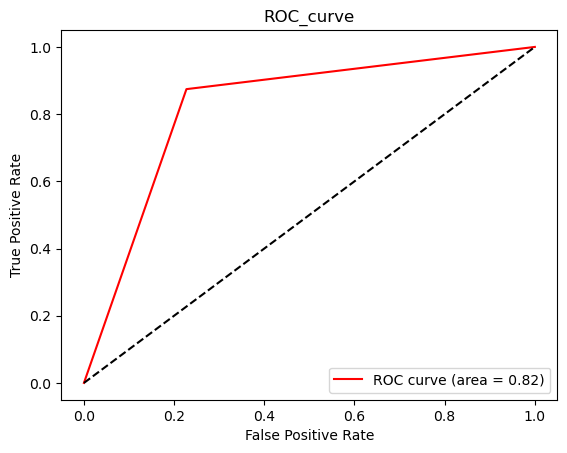

In [172]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,color='Red', label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="Black", linestyle="--")
plt.title("ROC_curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

plt.show()

#### Saving model

In [174]:
import pickle

#saving model
pickle.dump(adb, open('churn.pkl', 'wb'))

In [175]:
#Load model
file= pickle.load(open('churn.pkl', 'rb'))

In [176]:
file.predict(x_test)

array([0., 1., 1., ..., 0., 0., 0.])

#### Conclusion

In [178]:
end= pd.DataFrame({"y_test actual": y_test, "Predicted output": y_pred, "Predicted output pickle": file.predict(x_test),
             "Correct Prediction?": y_test==y_pred})
end.shape

(3105, 4)

In [179]:
end.sample(50)

,y_test actual,Predicted output,Predicted output pickle,Correct Prediction?
1846,0.0,0.0,0.0,True
1727,0.0,0.0,0.0,True
6470,0.0,0.0,0.0,True
5483,1.0,1.0,1.0,True
9440,1.0,1.0,1.0,True
4521,0.0,0.0,0.0,True
9630,1.0,0.0,0.0,False
1270,0.0,0.0,0.0,True
5691,0.0,0.0,0.0,True
8145,1.0,1.0,1.0,True
